In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import japanize_matplotlib
import re

In [84]:
suumo = pd.read_csv('./data/csv/SuumoDetailsFinal20221108.csv')

In [3]:
# 順番調整
def order_mean(group, by, index, asc):
    sort_describe = suumo.groupby(group).describe()[by].sort_values(index,ascending=asc)
    order = sort_describe.index
    return order

In [4]:
# この文字列ありますか？関数
def search_object(search,object):
    return bool(re.search(search,object))

# 相関係数

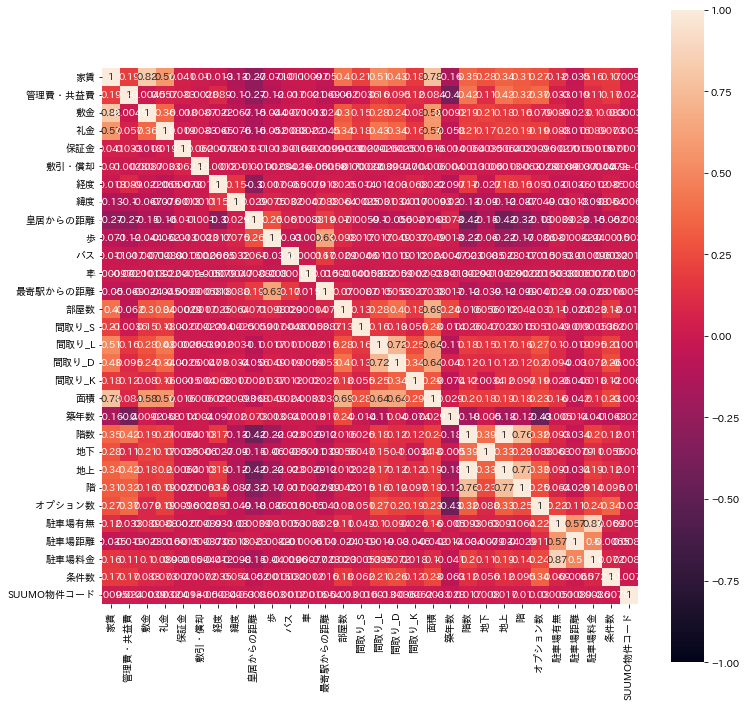

In [9]:
plt.figure(figsize=(12,12))
sns.heatmap(suumo.corr(),annot=True, vmax=1,vmin=-1, square=True)
plt.show()

In [12]:
suumo.columns

Index(['物件名', '家賃', '管理費・共益費', '敷金', '礼金', '保証金', '敷引・償却', '都道府県', '市区町村',
       '市区町村以下', '経度', '緯度', '皇居からの距離', '駅徒歩', '路線', '駅', '歩', 'バス', '車',
       '最寄駅からの距離', '部屋数', '間取り_S', '間取り_L', '間取り_D', '間取り_K', '面積', '築年数',
       '階数', '地下', '地上', '階', '向き', '建物種別', 'オプション', 'オプション数', '構造', '駐車場有無',
       '駐車場距離', '駐車場料金', '入居', '取引態様', '条件', '条件数', 'SUUMO物件コード', 'url'],
      dtype='object')

In [11]:
suumo.corr()['家賃']

家賃            1.000000
管理費・共益費       0.192467
敷金            0.821271
礼金            0.568489
保証金           0.041295
敷引・償却         0.010063
経度           -0.012672
緯度           -0.125315
皇居からの距離      -0.272533
歩            -0.071105
バス           -0.010775
車            -0.000971
最寄駅からの距離     -0.050137
部屋数           0.398814
間取り_S         0.207742
間取り_L         0.511864
間取り_D         0.428671
間取り_K         0.177266
面積            0.776382
築年数          -0.163725
階数            0.350501
地下            0.281040
地上            0.340101
階             0.309915
オプション数        0.267247
駐車場有無         0.124974
駐車場距離        -0.035170
駐車場料金         0.163126
条件数           0.172510
SUUMO物件コード    0.009522
Name: 家賃, dtype: float64

## 家賃

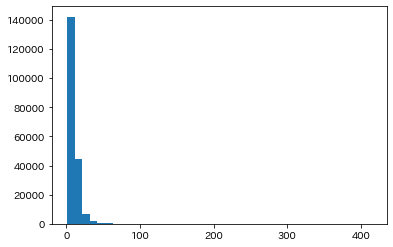

In [146]:
# 極端すぎてどっか行っちゃうあるある
feature = '家賃'
plt.hist(suumo[feature], bins=40)
plt.show()

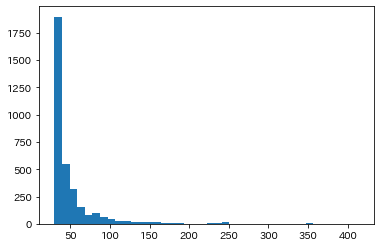

In [148]:
# 極端すぎてどっか行っちゃうあるある
feature = '家賃'
condition = suumo[feature] >= 30
plt.hist(suumo.loc[condition,feature], bins=40)
plt.show()

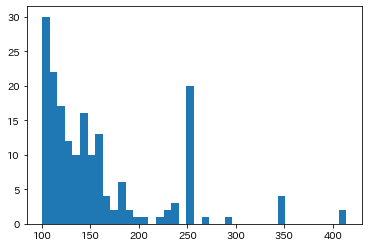

In [150]:
# 極端すぎてどっか行っちゃうあるある
feature = '家賃'
condition = suumo[feature] >= 100
plt.hist(suumo.loc[condition,feature], bins=40)
plt.show()

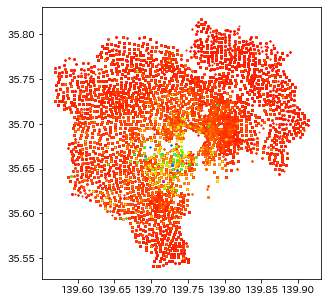

In [156]:
# 超高額物件に比べりゃ大抵の物件はゴミ同然さ
feature = '家賃'
order = sorted(suumo[feature].unique())
max_ = suumo[feature].max()
min_ = suumo[feature].min()
scale = max_ - min_

plt.figure(figsize=(5,5))
for value in order:
    condition = suumo[feature] == value
    plt.scatter(suumo.loc[condition,'経度'],suumo.loc[condition,'緯度'], color=cm.hsv((value-min_)/scale), s=1)
plt.show()

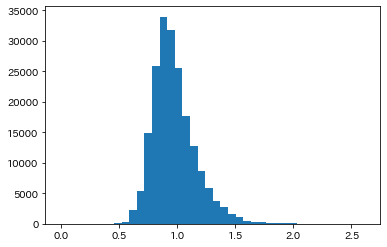

In [161]:
# 対数変換してみた
# なかなかきれいな山になりましたね
feature = '家賃'
plt.hist(np.log10(suumo[feature]), bins=40)
plt.show()

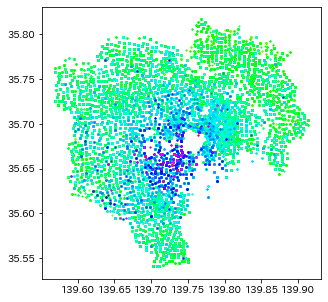

In [162]:
# 対数変換してみた
# 港区あたりが強力なのが良くわかる
feature = '家賃'
order = np.log10(sorted(suumo[feature].unique()))
max_ = np.log10(suumo[feature]).max()
min_ = np.log10(suumo[feature]).min()
scale = max_ - min_

plt.figure(figsize=(5,5))
for value in order:
    condition = np.log10(suumo[feature]) == value
    plt.scatter(suumo.loc[condition,'経度'],suumo.loc[condition,'緯度'], color=cm.hsv((value-min_)/scale), s=1)
plt.show()

## 管理費・共益費

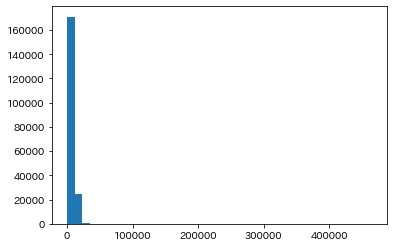

In [165]:
# 極端すぎてどっか行っちゃうあるある
feature = '管理費・共益費'
plt.hist(suumo[feature], bins=40)
plt.show()

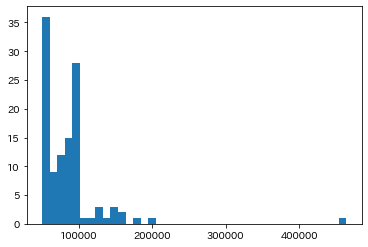

In [229]:
# 極端すぎてどっか行っちゃうあるある
# 管理費400万超えはマジでなんなん
feature = '管理費・共益費'
condition = suumo[feature] >= 50000
plt.hist(suumo.loc[condition,feature], bins=40)
plt.show()

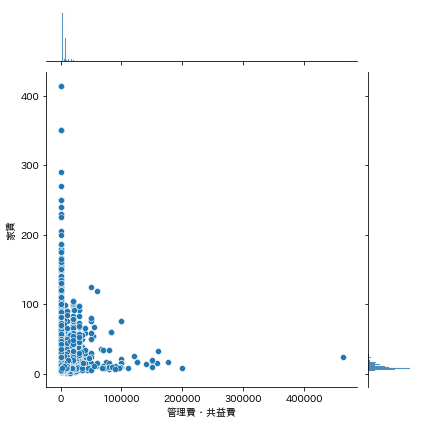

In [166]:
feature = '管理費・共益費'
sns.jointplot(data=suumo, x=feature, y='家賃')
plt.show()

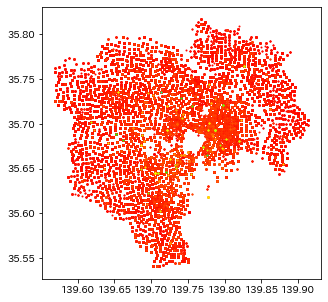

In [167]:
# 超高額物件に比べりゃ大抵の物件はゴミ同然さ
feature = '管理費・共益費'
order = sorted(suumo[feature].unique())
max_ = suumo[feature].max()
min_ = suumo[feature].min()
scale = max_ - min_

plt.figure(figsize=(5,5))
for value in order:
    condition = suumo[feature] == value
    plt.scatter(suumo.loc[condition,'経度'],suumo.loc[condition,'緯度'], color=cm.hsv((value-min_)/scale), s=1)
plt.show()

In [235]:
condition = (suumo['管理費・共益費'] < 10) & (suumo['管理費・共益費'] > 0)
suumo.loc[condition,'管理費・共益費']

168493    1
168584    1
172780    2
172807    2
Name: 管理費・共益費, dtype: int64

In [239]:
# 管理費2円はマジで2円らしい
print(suumo.loc[172780,'url'])

https://suumo.jp/chintai/jnc_000076096708/?bc=100275375113


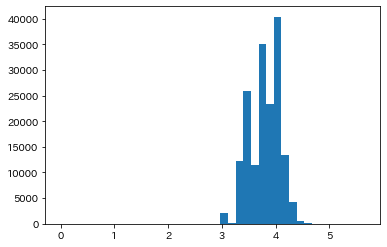

In [243]:
# 対数変換してみた
# 大抵は1万もいかないですよねそうですよね
feature = '管理費・共益費'
condition = suumo[feature] > 0
plt.hist(np.log10(suumo.loc[condition,feature]), bins=40)
plt.show()

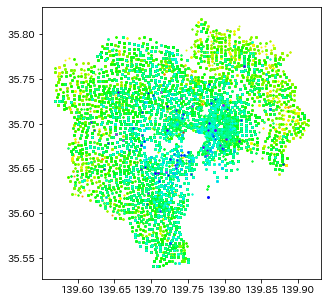

In [247]:
# 対数変換してみた
# 黒点が高額物件なんじゃね？
feature = '管理費・共益費'
condition = (suumo[feature] > 0) & (np.log10(suumo[feature]) > 3)
order = np.log10(sorted(suumo.loc[condition,feature].unique()))
max_ = np.log10(suumo.loc[condition,feature]).max()
min_ = np.log10(suumo.loc[condition,feature]).min()
scale = max_ - min_


plt.figure(figsize=(5,5))
for value in order:
    condition = np.log10(suumo[feature]) == value
    plt.scatter(suumo.loc[condition,'経度'],suumo.loc[condition,'緯度'], color=cm.hsv((value-min_)/scale), s=1)
plt.show()

## 敷金

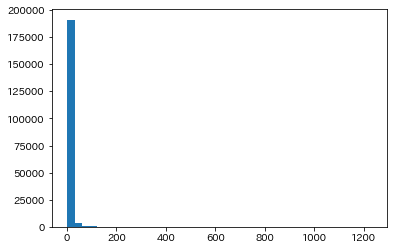

In [168]:
# 極端すぎてどっか行っちゃうあるある
feature = '敷金'
plt.hist(suumo[feature], bins=40)
plt.show()

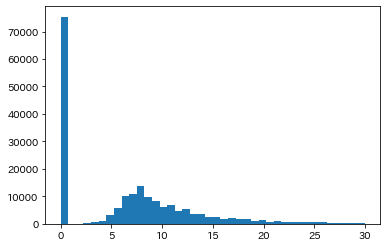

In [251]:
# 敷金をもらわない物件は多い。
feature = '敷金'
condition = suumo[feature] < 30
plt.hist(suumo.loc[condition,feature], bins=40)
plt.show()

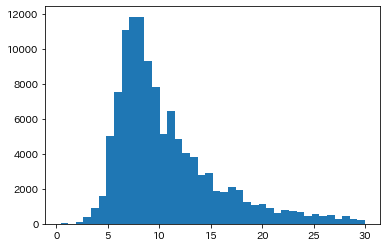

In [252]:
# だいたいこんな感じ
feature = '敷金'
condition = (suumo[feature] < 30) & (suumo[feature] > 0)
plt.hist(suumo.loc[condition,feature], bins=40)
plt.show()

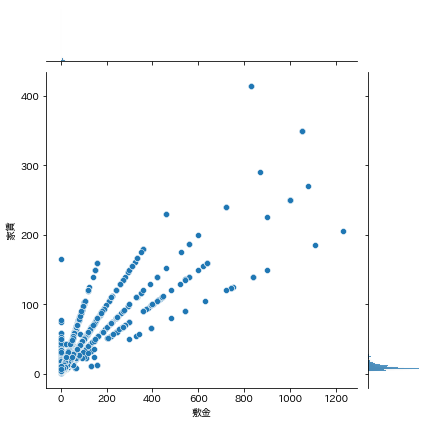

In [169]:
feature = '敷金'
sns.jointplot(data=suumo, x=feature, y='家賃')
plt.show()

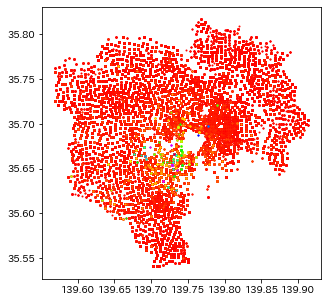

In [170]:
# 超高額物件に比べりゃ大抵の物件はゴミ同然さ
feature = '敷金'
order = sorted(suumo[feature].unique())
max_ = suumo[feature].max()
min_ = suumo[feature].min()
scale = max_ - min_

plt.figure(figsize=(5,5))
for value in order:
    condition = suumo[feature] == value
    plt.scatter(suumo.loc[condition,'経度'],suumo.loc[condition,'緯度'], color=cm.hsv((value-min_)/scale), s=1)
plt.show()

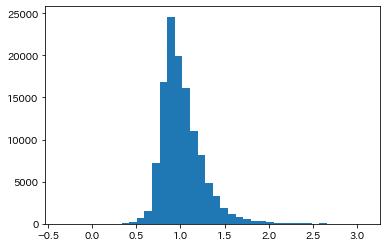

In [253]:
# 対数変換してみた
# 大抵は1万もいかないですよねそうですよね
feature = '敷金'
condition = suumo[feature] > 0
plt.hist(np.log10(suumo.loc[condition,feature]), bins=40)
plt.show()

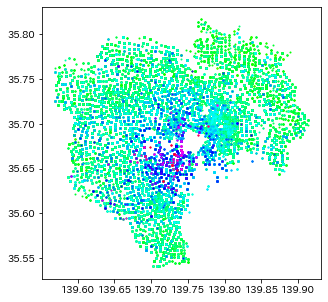

In [255]:
# 対数変換してみた
feature = '敷金'
condition = (suumo[feature] > 0)
order = np.log10(sorted(suumo.loc[condition,feature].unique()))
max_ = np.log10(suumo.loc[condition,feature]).max()
min_ = np.log10(suumo.loc[condition,feature]).min()
scale = max_ - min_


plt.figure(figsize=(5,5))
for value in order:
    condition = np.log10(suumo[feature]) == value
    plt.scatter(suumo.loc[condition,'経度'],suumo.loc[condition,'緯度'], color=cm.hsv((value-min_)/scale), s=1)
plt.show()

## 礼金

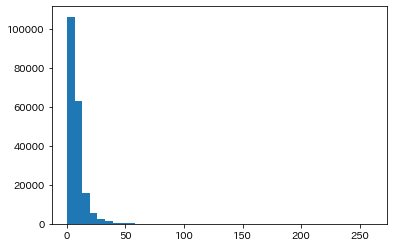

In [171]:
# 極端すぎてどっか行っちゃうあるある
feature = '礼金'
plt.hist(suumo[feature], bins=40)
plt.show()

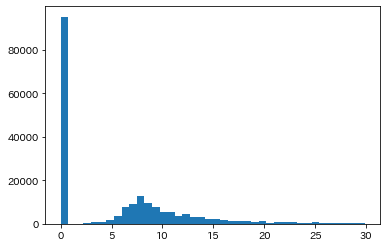

In [256]:
# 礼金をもらわない物件は多い。
feature = '礼金'
condition = suumo[feature] < 30
plt.hist(suumo.loc[condition,feature], bins=40)
plt.show()

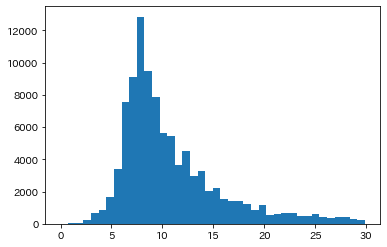

In [257]:
# 敷金と礼金は大して変わらん
feature = '礼金'
condition = (suumo[feature] < 30) & (suumo[feature] > 0)
plt.hist(suumo.loc[condition,feature], bins=40)
plt.show()

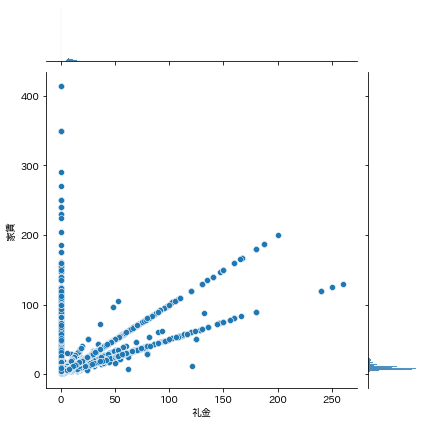

In [172]:
feature = '礼金'
sns.jointplot(data=suumo, x=feature, y='家賃')
plt.show()

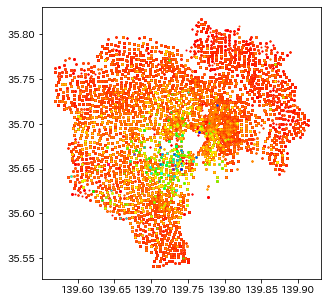

In [173]:
# 超高額物件に比べりゃ大抵の物件はゴミ同然さ
feature = '礼金'
order = sorted(suumo[feature].unique())
max_ = suumo[feature].max()
min_ = suumo[feature].min()
scale = max_ - min_

plt.figure(figsize=(5,5))
for value in order:
    condition = suumo[feature] == value
    plt.scatter(suumo.loc[condition,'経度'],suumo.loc[condition,'緯度'], color=cm.hsv((value-min_)/scale), s=1)
plt.show()

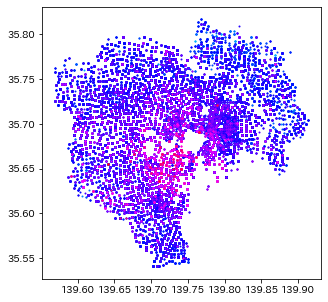

In [258]:
# 対数変換してみた
feature = '礼金'
condition = (suumo[feature] > 0)
order = np.log10(sorted(suumo.loc[condition,feature].unique()))
max_ = np.log10(suumo.loc[condition,feature]).max()
min_ = np.log10(suumo.loc[condition,feature]).min()
scale = max_ - min_


plt.figure(figsize=(5,5))
for value in order:
    condition = np.log10(suumo[feature]) == value
    plt.scatter(suumo.loc[condition,'経度'],suumo.loc[condition,'緯度'], color=cm.hsv((value-min_)/scale), s=1)
plt.show()

## 保証金

※保証金は実質敷金です。

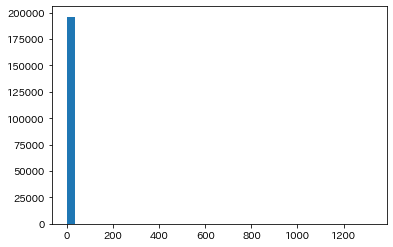

In [174]:
# 極端すぎてどっか行っちゃうあるある
feature = '保証金'
plt.hist(suumo[feature], bins=40)
plt.show()

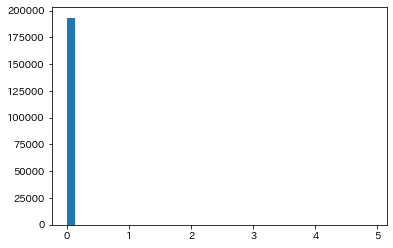

In [269]:
# そもそも保証金を設定している物件が少数なのだ
feature = '保証金'
condition = suumo[feature] < 5
plt.hist(suumo.loc[condition,feature], bins=40)
plt.show()

In [274]:
# 保証金を設定している物件は1.5％しかないのだ。
condition = suumo[feature] == 0
num = suumo.loc[condition,feature].count()
all_ = suumo.shape[0]
print(num,num/all_)

193326 0.9858893484214123


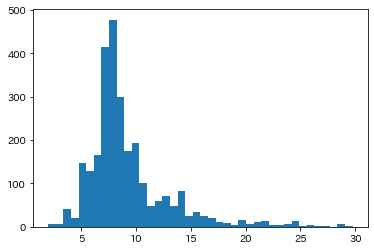

In [265]:
# 設定しているとしたら7~8万
feature = '保証金'
condition = (suumo[feature] < 30) & (suumo[feature] > 0)
plt.hist(suumo.loc[condition,feature], bins=40)
plt.show()

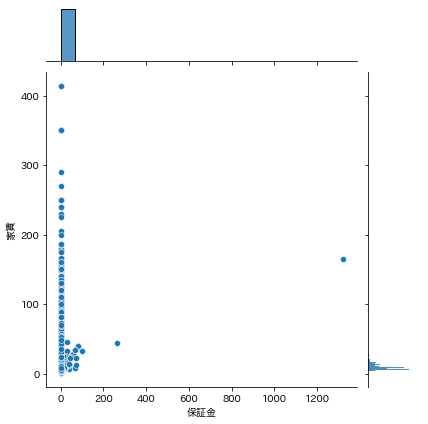

In [175]:
feature = '保証金'
sns.jointplot(data=suumo, x=feature, y='家賃')
plt.show()

In [260]:
condition = suumo['保証金'] > 200
suumo.loc[condition,'保証金']

159546     264.0
192459    1320.0
Name: 保証金, dtype: float64

In [263]:
print(suumo.loc[192459,'url'])

https://suumo.jp/chintai/jnc_000075713523/?bc=100286270758


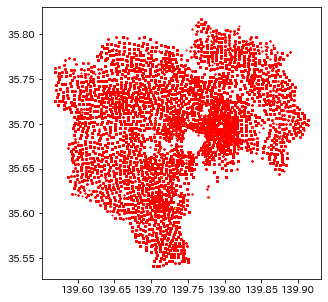

In [176]:
# 超高額物件に比べりゃ大抵の物件はゴミ同然さ
feature = '保証金'
order = sorted(suumo[feature].unique())
max_ = suumo[feature].max()
min_ = suumo[feature].min()
scale = max_ - min_

plt.figure(figsize=(5,5))
for value in order:
    condition = suumo[feature] == value
    plt.scatter(suumo.loc[condition,'経度'],suumo.loc[condition,'緯度'], color=cm.hsv((value-min_)/scale), s=1)
plt.show()

## 敷引・償却

※敷引・償却とは敷金のうち返ってこない金額のこと

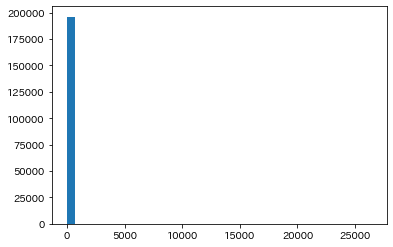

In [177]:
# 極端すぎてどっか行っちゃうあるある
feature = '敷引・償却'
plt.hist(suumo[feature], bins=40)
plt.show()

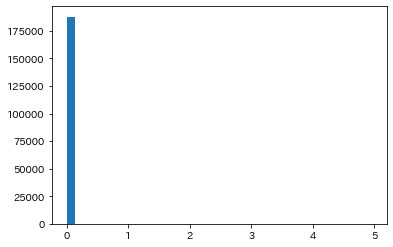

In [276]:
# そもそも敷引・償却している物件が少数なのだ
feature = '敷引・償却'
condition = suumo[feature] < 5
plt.hist(suumo.loc[condition,feature], bins=40)
plt.show()

In [277]:
# 保証金を設定している物件は5％しかないのだ。
condition = suumo[feature] == 0
num = suumo.loc[condition,feature].count()
all_ = suumo.shape[0]
print(num,num/all_)

187832 0.9578720301081629


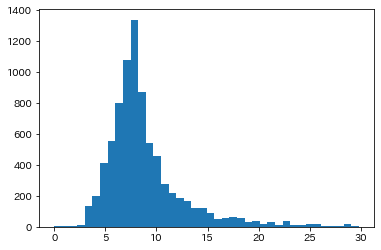

In [278]:
# 設定しているとしたら7~8万
feature = '敷引・償却'
condition = (suumo[feature] < 30) & (suumo[feature] > 0)
plt.hist(suumo.loc[condition,feature], bins=40)
plt.show()

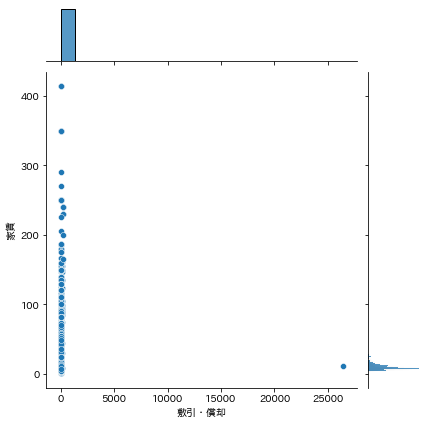

In [178]:
feature = '敷引・償却'
sns.jointplot(data=suumo, x=feature, y='家賃')
plt.show()

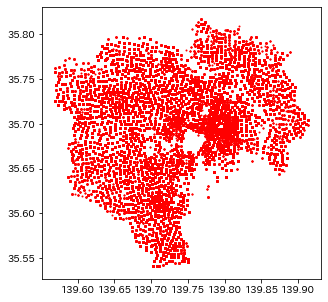

In [179]:
# 超高額物件に比べりゃ大抵の物件はゴミ同然さ
feature = '敷引・償却'
order = sorted(suumo[feature].unique())
max_ = suumo[feature].max()
min_ = suumo[feature].min()
scale = max_ - min_

plt.figure(figsize=(5,5))
for value in order:
    condition = suumo[feature] == value
    plt.scatter(suumo.loc[condition,'経度'],suumo.loc[condition,'緯度'], color=cm.hsv((value-min_)/scale), s=1)
plt.show()

## 市区町村

In [15]:
# 東京23区
print(suumo['市区町村'].unique())

['大田区' '荒川区' '足立区' '葛飾区' '台東区' '中野区' '品川区' '千代田区' '目黒区' '江戸川区' '文京区' '練馬区'
 '中央区' '北区' '豊島区' '墨田区' '板橋区' '江東区' '杉並区' '港区' '渋谷区' '世田谷区' '新宿区']


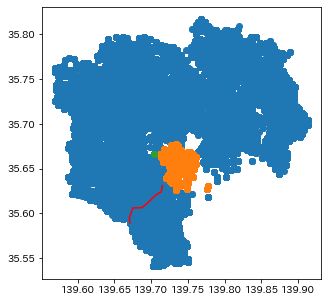

In [76]:
ward = '港区'
line = '東急目黒線'
station = '明治神宮前'

condition_ward = suumo['市区町村'] == ward
condition_line = station_all['路線'] == line
condition_station = station_all['駅'] == station

plt.figure(figsize=(5,5))
plt.scatter(suumo['経度'],suumo['緯度'])

plt.scatter(
    suumo.loc[condition_ward,'経度'],
    suumo.loc[condition_ward,'緯度']
)

plt.plot(
    station_all.loc[condition_line,'経度'],
    station_all.loc[condition_line,'緯度'],
    color = "red"
)

plt.scatter(
    station_all.loc[condition_station,'経度'],
    station_all.loc[condition_station,'緯度']
)
plt.savefig("./data/image/mostvaluableplace.png")
plt.show()

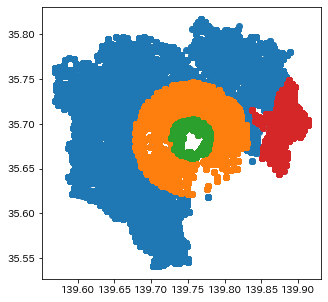

In [18]:
place = '江戸川区'

i = suumo['市区町村'].unique().tolist().index(place)
condition = suumo['市区町村'] == suumo['市区町村'].unique()[i]

plt.figure(figsize=(5,5))
plt.scatter(suumo['経度'],suumo['緯度'])
condition1 = suumo['皇居からの距離'] < 7000
plt.scatter(suumo.loc[condition1,'経度'],suumo.loc[condition1,'緯度'])
condition2 = suumo['皇居からの距離'] < 2500
plt.scatter(suumo.loc[condition2,'経度'],suumo.loc[condition2,'緯度'])

plt.scatter(
    suumo.loc[condition,'経度'],
    suumo.loc[condition,'緯度']
)
plt.show()

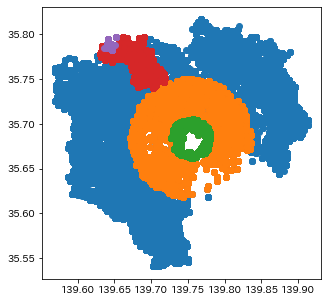

In [51]:
place = '板橋区'
station = '西高島平駅'

plt.figure(figsize=(5,5))
plt.scatter(suumo['経度'],suumo['緯度'])
condition1 = suumo['皇居からの距離'] < 7500
plt.scatter(suumo.loc[condition1,'経度'],suumo.loc[condition1,'緯度'])
condition2 = suumo['皇居からの距離'] < 2500
plt.scatter(suumo.loc[condition2,'経度'],suumo.loc[condition2,'緯度'])

i = suumo['市区町村'].unique().tolist().index(place)
condition_place = suumo['市区町村'] == suumo['市区町村'].unique()[i]
plt.scatter(
    suumo.loc[condition_place,'経度'],
    suumo.loc[condition_place,'緯度']
)

i = suumo['駅'].unique().tolist().index(station)
condition_station = suumo['駅'] == suumo['駅'].unique()[i]
plt.scatter(
    suumo.loc[condition_station,'経度'],
    suumo.loc[condition_station,'緯度']
)
plt.show()

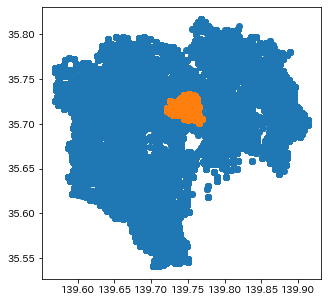

In [13]:
# あの区はどこ？
place = '文京区'

i = suumo['市区町村'].unique().tolist().index(place)
condition = suumo['市区町村'] == suumo['市区町村'].unique()[i]
plt.figure(figsize=(5,5))
plt.scatter(suumo['経度'],suumo['緯度'])
plt.scatter(
    suumo.loc[condition,'経度'],
    suumo.loc[condition,'緯度']
)
plt.show()

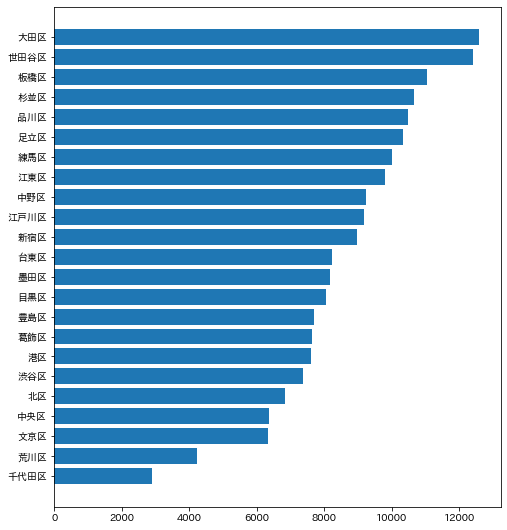

In [18]:
# 各区の物件数
feature = '市区町村'

height = suumo[feature].unique().shape[0] * (2/5)
width = 8
counts = suumo.groupby(feature, as_index=False).count()[[feature,'SUUMO物件コード']].sort_values('SUUMO物件コード')
plt.figure(figsize=(8,height))
plt.barh(counts[feature],counts['SUUMO物件コード'])
plt.show()

In [20]:
# めちゃくちゃ少ないってことはない
feature = '市区町村'
counts = suumo.groupby(feature, as_index=False).count()[[feature,'SUUMO物件コード']]
counts.rename(columns = {'SUUMO物件コード':'count'}, inplace=True)
counts['ratio'] = counts['count'] / suumo.shape[0]
counts.sort_values('count')[:20]

市区町村  count     ratio
4   千代田区   2903  0.014804
19   荒川区   4219  0.021515
9    文京区   6330  0.032281
1    中央区   6354  0.032403
3     北区   6850  0.034932
15   渋谷区   7360  0.037533
16    港区   7616  0.038839
20   葛飾区   7635  0.038936
21   豊島区   7688  0.039206
17   目黒区   8035  0.040975
7    墨田区   8170  0.041664
5    台東区   8227  0.041955
10   新宿区   8979  0.045789
13  江戸川区   9189  0.046860
2    中野区   9235  0.047095
14   江東区   9802  0.049986
18   練馬区   9990  0.050945
22   足立区  10320  0.052628
6    品川区  10489  0.053490
11   杉並区  10655  0.054336

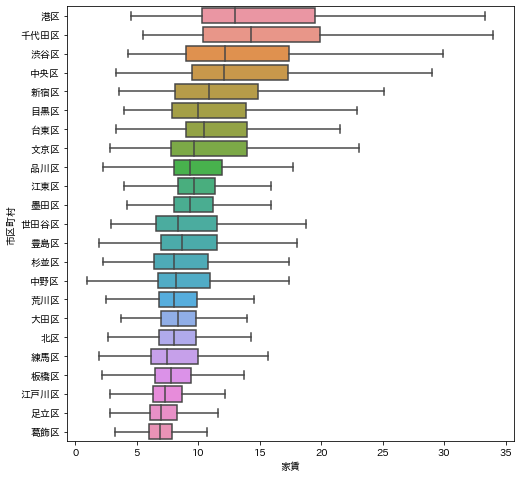

In [40]:
# 23区と賃料の関係
feature = '市区町村'
order = order_mean(feature, '家賃', 'mean', False)
plt.figure(figsize=(8,8))
sns.boxplot(data=suumo, x='家賃', y=feature, order=order, sym='')
plt.show()

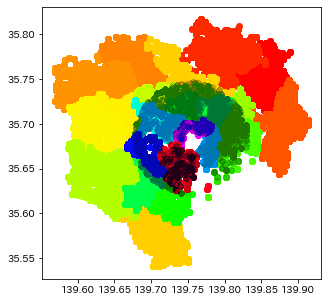

In [116]:
# 賃料平均の優劣で色分け
feature = '市区町村'
order_table = suumo.groupby(feature, as_index=False).mean()[[feature,'家賃']].sort_values('家賃')

max_ = order_table['家賃'].max()
min_ = order_table['家賃'].min()
scale = max_ - min_

plt.figure(figsize=(5,5))
for ku, rent in order_table.values:
    condition = suumo[feature] == ku
    plt.scatter(suumo.loc[condition,'経度'],suumo.loc[condition,'緯度'], color=cm.hsv((rent - min_)/scale))

condition1 = suumo['皇居からの距離'] < 7000
plt.scatter(suumo.loc[condition1,'経度'],suumo.loc[condition1,'緯度'],alpha=0.002)
# condition2 = suumo['皇居からの距離'] < 2000
# plt.scatter(suumo.loc[condition2,'経度'],suumo.loc[condition2,'緯度'],alpha=0.003)
plt.savefig('./data/image/horizon_ward_7000.png')
plt.show()

## 皇居からの距離

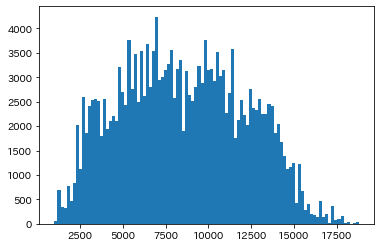

In [9]:
# いい感じに散らばってますね。
feature = '皇居からの距離'
plt.hist(suumo[feature], bins=100)
plt.show()

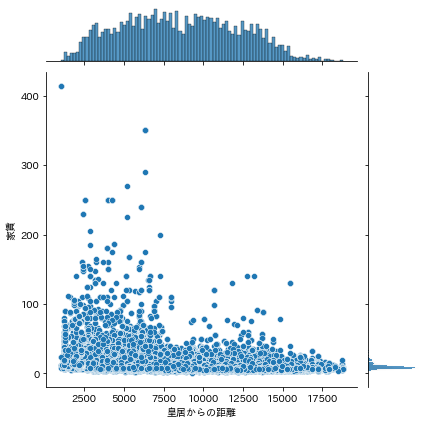

In [181]:
feature = '皇居からの距離'
sns.jointplot(data=suumo, x=feature, y='家賃')
plt.show()

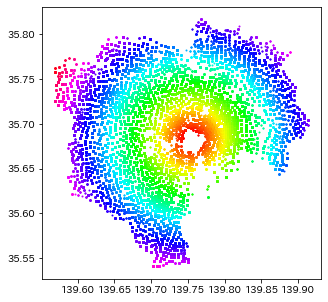

In [182]:
# キレイなグラデーション(当然)
feature = '皇居からの距離'
order = sorted(suumo[feature].unique())
max_ = suumo[feature].max()
min_ = suumo[feature].min()
scale = max_ - min_

plt.figure(figsize=(5,5))
for value in order:
    condition = suumo[feature] == value
    plt.scatter(suumo.loc[condition,'経度'],suumo.loc[condition,'緯度'], color=cm.hsv((value-min_)/scale), s=1)
plt.show()

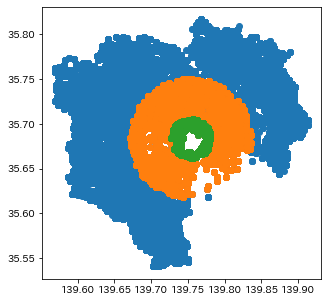

In [27]:
plt.figure(figsize=(5,5))
plt.scatter(suumo['経度'],suumo['緯度'])
condition1 = suumo['皇居からの距離'] < 7500
plt.scatter(suumo.loc[condition1,'経度'],suumo.loc[condition1,'緯度'])
condition2 = suumo['皇居からの距離'] < 2500
plt.scatter(suumo.loc[condition2,'経度'],suumo.loc[condition2,'緯度'])
plt.show()

## 路線

In [50]:
# 路線は65種類
print((suumo['路線'].unique()))

['京急空港線' '東京メトロ千代田線' '日暮里・舎人ライナー' '都電荒川線' '東京メトロ日比谷線' 'ＪＲ常磐線' 'ＪＲ山手線'
 '京成本線' '西武新宿線' '都営新宿線' '東急東横線' '京成押上線' '東武伊勢崎線' '都営三田線' '東京メトロ南北線'
 '東急目黒線' '北総線' '都営大江戸線' '東京メトロ有楽町線' 'ＪＲ京葉線' '都営浅草線' 'つくばエクスプレス'
 '東京メトロ丸ノ内線' '東京メトロ銀座線' '東急田園都市線' '西武池袋線' 'ＪＲ中央線' '東武東上線' '東京メトロ半蔵門線'
 '東急池上線' 'ＪＲ総武線快速' 'ＪＲ総武線' '京王新線' 'ＪＲ京浜東北線' '成田スカイアクセス' '京成金町線' '東京メトロ東西線'
 '東京メトロ副都心線' '新交通ゆりかもめ' '京王井の頭線' 'ＪＲ埼京線' '東急大井町線' 'ＪＲ横須賀線' '湘南新宿ライン高海'
 '東武大師線' '京急本線' '京王線' '小田急線' '東急世田谷線' 'ＪＲ宇都宮線' 'りんかい線' '東武亀戸線' '湘南新宿ライン宇須'
 '東京モノレール' '東急多摩川線' 'ＪＲ東海道本線' 'ＪＲ高崎線' '埼玉高速鉄道' '西武豊島線' '西武有楽町線' '東北新幹線'
 '東海道新幹線' '赤26' '都バス' '東急バス']


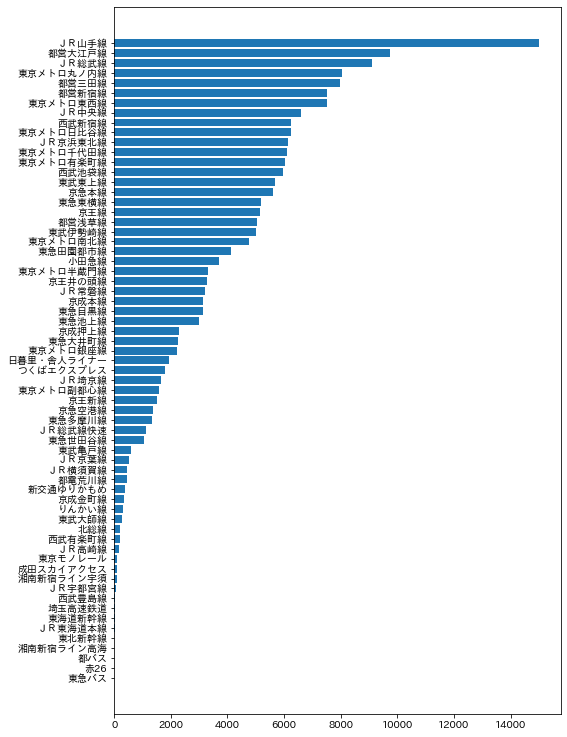

In [51]:
# 各路線の物件数
# 山手線はぶっちぎりですな
# ごく少数の路線もちらほら
feature = '路線'

height = suumo[feature].unique().shape[0] * (1/5)
width = 8
counts = suumo.groupby(feature, as_index=False).count()[[feature,'SUUMO物件コード']].sort_values('SUUMO物件コード')
plt.figure(figsize=(8,height))
plt.barh(counts[feature],counts['SUUMO物件コード'])
plt.show()

In [21]:
# 10さえない路線もいくらか
# 電車の路線じゃないやつもいますね。
feature = '路線'
counts = suumo.groupby(feature, as_index=False).count()[[feature,'SUUMO物件コード']]
counts.rename(columns = {'SUUMO物件コード':'count'}, inplace=True)
counts['ratio'] = counts['count'] / suumo.shape[0]
counts.sort_values('count')[20:]

路線  count     ratio
52       都電荒川線    443  0.002259
61      ＪＲ横須賀線    456  0.002325
55       ＪＲ京葉線    508  0.002591
35       東武亀戸線    604  0.003080
28      東急世田谷線   1041  0.005309
63     ＪＲ総武線快速   1140  0.005814
29      東急多摩川線   1348  0.006874
3        京急空港線   1372  0.006997
8         京王新線   1503  0.007665
17   東京メトロ副都心線   1575  0.008032
56       ＪＲ埼京線   1644  0.008384
0    つくばエクスプレス   1786  0.009108
15  日暮里・舎人ライナー   1925  0.009817
24    東京メトロ銀座線   2205  0.011245
30      東急大井町線   2254  0.011495
4        京成押上線   2287  0.011663
32       東急池上線   3005  0.015324
34       東急目黒線   3119  0.015906
5         京成本線   3147  0.016049
59       ＪＲ常磐線   3214  0.016390
7       京王井の頭線   3290  0.016778
19   東京メトロ半蔵門線   3311  0.016885
12        小田急線   3705  0.018894
33     東急田園都市線   4123  0.021026
20    東京メトロ南北線   4772  0.024335
36      東武伊勢崎線   5023  0.025615
51       都営浅草線   5044  0.025722
9          京王線   5147  0.026248
31       東急東横線   5172  0.026375
2         京急本線   5626  0.028690
38       東武東上線   5667  0.028900
44       西武池袋線   5974  0.030465
22   東京メトロ有楽町線   6016  0.030679
18   東京メトロ千代田線   6104  0.031128
54     ＪＲ京浜東北線   6123  0.031225
21   東京メトロ日比谷線   6240  0.031822
42       西武新宿線   6241  0.031827
53       ＪＲ中央線   6615  0.033734
23    東京メトロ東西線   7517  0.038334
50       都営新宿線   7528  0.038390
48       都営三田線   7967  0.040629
16   東京メトロ丸ノ内線   8056  0.041083
62       ＪＲ総武線   9112  0.046468
49      都営大江戸線   9743  0.049686
58       ＪＲ山手線  15016  0.076576

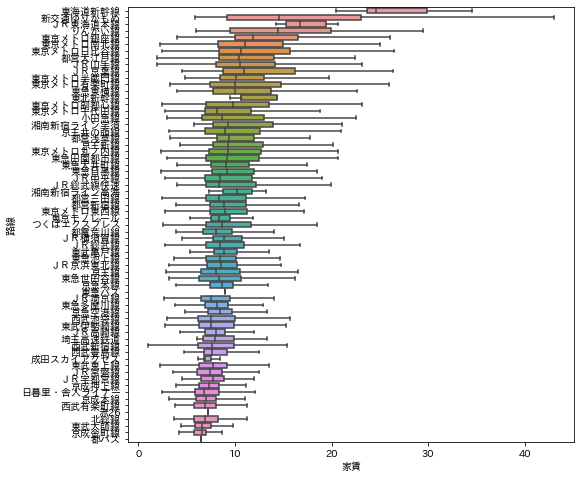

In [41]:
# 23区と賃料の関係
# 東海道新幹線が破壊する
feature = '路線'
order = order_mean(feature, '家賃', 'mean', False)
plt.figure(figsize=(8,8))
sns.boxplot(data=suumo, x='家賃', y=feature, order=order, sym='')
plt.show()

In [30]:
station_all = pd.read_csv('./data/csv/station_all.csv')
station_all['路線'].unique()

array(['つくばエクスプレス', 'りんかい線', '京急本線', '京急空港線', '京成押上線', '京成本線', '京成金町線',
       '京王井の頭線', '京王動物園線', '京王新線', '京王相模原線', '京王競馬場線', '京王線', '京王高尾線',
       '北総線', '千代田有楽町連絡線', '埼玉高速鉄道', '多摩都市モノレール線', '小田急多摩線', '小田急線',
       '御岳登山ケーブル', '新交通ゆりかもめ', '日暮里・舎人ライナー', '東京メトロ丸ノ内線', '東京メトロ副都心線',
       '東京メトロ千代田線', '東京メトロ半蔵門線', '東京メトロ南北線', '東京メトロ日比谷線', '東京メトロ有楽町線',
       '東京メトロ東西線', '東京メトロ銀座線', '東京モノレール', '東北新幹線', '東急世田谷線', '東急多摩川線',
       '東急大井町線', '東急東横線', '東急池上線', '東急田園都市線', '東急目黒線', '東武亀戸線', '東武伊勢崎線',
       '東武大師線', '東武東上線', '東海道新幹線', '湘南新宿ライン宇須', '西武国分寺線', '西武園線',
       '西武多摩川線', '西武多摩湖線(国分寺-萩山)', '西武多摩湖線(萩山-多摩湖)', '西武山口線', '西武拝島線',
       '西武新宿線', '西武有楽町線', '西武池袋線', '西武豊島線', '都営三田線', '都営大江戸線', '都営新宿線',
       '都営浅草線', '都電荒川線', '高尾登山ケーブル', 'ＪＲ上越新幹線', 'ＪＲ中央線', 'ＪＲ五日市線',
       'ＪＲ京浜東北線', 'ＪＲ京葉線', 'ＪＲ八高線(八王子-高麗川)', 'ＪＲ北陸新幹線(長野経由)',
       'ＪＲ南武線(川崎-立川)', 'ＪＲ埼京線', 'ＪＲ宇都宮線', 'ＪＲ山手線', 'ＪＲ常磐線', 'ＪＲ東海道本線',
       'ＪＲ横浜線', 'ＪＲ横須賀武蔵野連絡線', 'ＪＲ横須賀線', 'ＪＲ武蔵野線(府中本町-南船橋)', 'ＪＲ総武線',
       'ＪＲ青梅線', nan], 

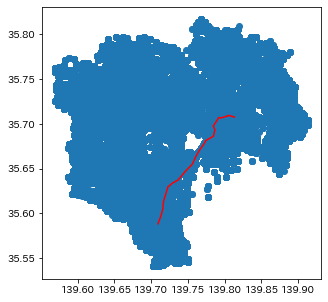

In [52]:
plt.figure(figsize=(5,5))
plt.scatter(suumo['経度'],suumo['緯度'])

line = '都営浅草線'
condition = station_all['路線'] == line
plt.plot(station_all.loc[condition, "経度"],station_all.loc[condition,"緯度"],color="red")

plt.show()

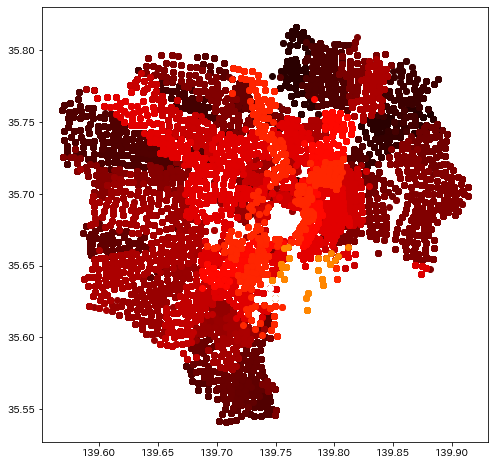

In [46]:
# 賃料平均の優劣で色分け
# ふわっと路線が見えてくる？
feature = '路線'
order_table = suumo.groupby(feature, as_index=False).mean()[[feature,'家賃']].sort_values('家賃')

max_ = order_table['家賃'].max()
min_ = order_table['家賃'].min()
scale = max_ - min_

plt.figure(figsize=(8,8))
for ku, rent in order_table.values:
    condition = suumo[feature] == ku
    plt.scatter(suumo.loc[condition,'経度'],suumo.loc[condition,'緯度'], color=cm.hot((rent - min_)/scale))

plt.show()

## 駅

In [133]:
# 駅は485種類
print((suumo['駅'].unique()))

['糀谷駅' '町屋駅' '熊野前駅' '宮ノ前駅' '三ノ輪駅' '南千住駅' '西日暮里駅' '荒川一中前駅' '扇大橋駅' '亀有駅'
 '綾瀬駅' '北千住駅' '新三河島駅' '谷在家駅' '鷺ノ宮駅' '目黒駅' '岩本町駅' '都立大学駅' '日暮里駅' '青砥駅'
 '京成立石駅' '新井薬師前駅' '鶯谷駅' '瑞江駅' '梅島駅' '浅草駅' '千石駅' '本駒込駅' '秋葉原駅' '上井草駅'
 '武蔵小山駅' '野方駅' '人形町駅' '不動前駅' '京成高砂駅' '蔵前駅' '千住大橋駅' '新富町駅' '入谷駅' '八丁堀駅'
 '茅場町駅' '勝どき駅' '小伝馬町駅' '中野新橋駅' '駒沢大学駅' '新御徒町駅' '上野駅' '王子神谷駅' '東長崎駅' '方南町駅'
 '都立家政駅' '中野駅' '六町駅' '新板橋駅' '下板橋駅' '押上駅' '田原町駅' '新大塚駅' '浜町駅' '東日本橋駅'
 '荏原中延駅' '末広町駅' '西台駅' '馬喰町駅' '浅草橋駅' '学芸大学駅' '西大島駅' '中目黒駅' '東中野駅' '駒込駅'
 '幡ケ谷駅' '王子駅' '一之江駅' '西新宿五丁目駅' '千駄木駅' '東大前駅' '中野坂上駅' '椎名町駅' '井荻駅' '両国駅'
 '西巣鴨駅' '森下駅' '四ツ木駅' '亀戸駅' '赤羽駅' '板橋本町駅' '月島駅' '新中野駅' '中野富士見町駅' '神田駅'
 '豊島園駅' '東陽町駅' '志村三丁目駅' '千川駅' '篠崎駅' '有明テニスの森駅' '永福町駅' '新日本橋駅' '春日駅' '板橋駅'
 '六本木駅' '乃木坂駅' '中板橋駅' '池尻大橋駅' 'お花茶屋駅' '小川町駅' '淡路町駅' '大手町駅' '豊洲駅' '大井町駅'
 '広尾駅' '渋谷駅' '稲荷町駅' '戸越公園駅' '西大井駅' '三越前駅' '御茶ノ水駅' '湯島駅' '錦糸町駅' '赤羽岩淵駅'
 '西新井大師西駅' '水道橋駅' '白山駅' '清澄白河駅' '地下鉄赤塚駅' '水天宮前駅' '仲御徒町駅' '新高円寺駅' '住吉駅'
 '中井駅' '氷川台駅' '武蔵関駅' '北綾瀬駅' '荻窪駅' '巣鴨駅' '平井駅' '新小岩駅' '池袋駅' '祐天寺駅' '大師前駅'
 

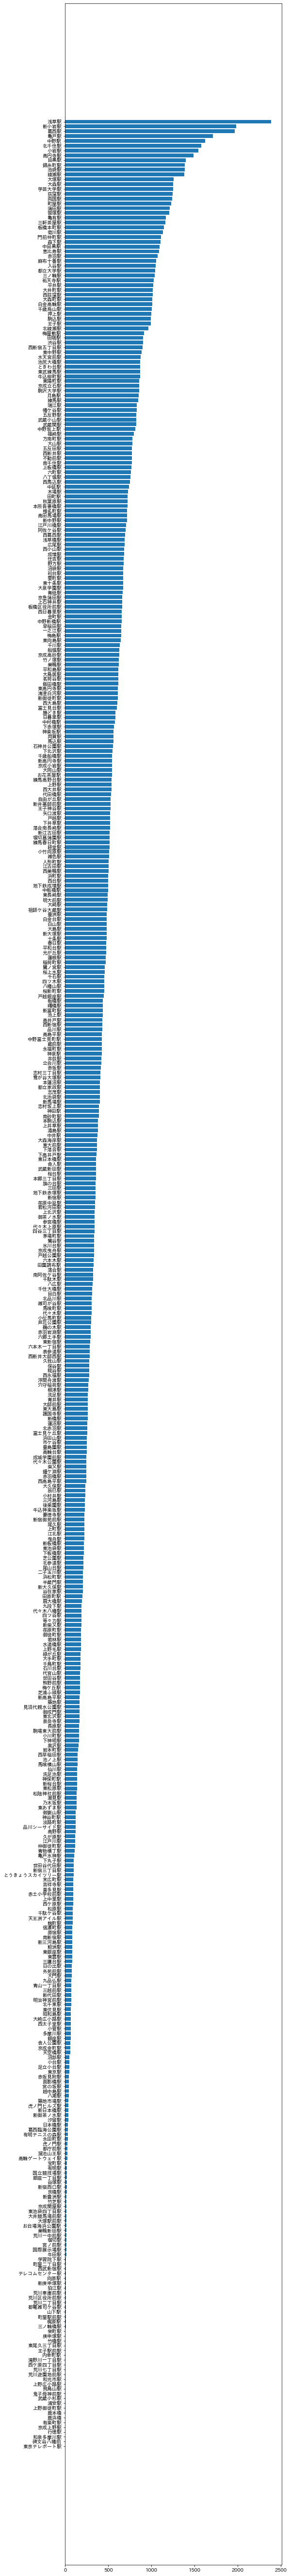

In [140]:
# 各駅の物件数
# 浅草周辺ってすごいね。
# ごく少数の駅もちらほら
feature = '駅'

height = suumo[feature].unique().shape[0] * (1/5)
width = 8
counts = suumo.groupby(feature, as_index=False).count()[[feature,'SUUMO物件コード']].sort_values('SUUMO物件コード')
plt.figure(figsize=(8,height))
plt.barh(counts[feature],counts['SUUMO物件コード'])
plt.show()

In [141]:
# 数件しかない駅もいくらか。他になかったのか？
# 電車の路線じゃないやつもいますね。
feature = '駅'
counts = suumo.groupby(feature, as_index=False).count()[[feature,'SUUMO物件コード']]
counts.rename(columns = {'SUUMO物件コード':'count'}, inplace=True)
counts['ratio'] = counts['count'] / suumo.shape[0]
counts.sort_values('count')[:20]

駅  count     ratio
244  東京テレポート駅      1  0.000005
343    碑文谷八幡前      1  0.000005
116    和泉多摩川駅      1  0.000005
401       行徳駅      1  0.000005
57      京成上野駅      1  0.000005
235      有楽町駅      1  0.000005
482       鹿浜橋      1  0.000005
481       鹿本橋      2  0.000010
20     上野御徒町駅      2  0.000010
309       浦安駅      2  0.000010
282     武蔵小杉駅      2  0.000010
476    鬼子母神前駅      3  0.000015
461      飛鳥山駅      4  0.000020
19     上野広小路駅      4  0.000020
115      和光市駅      4  0.000020
388   荒川遊園地前駅      5  0.000025
384    荒川七丁目駅      5  0.000025
403   西ケ原四丁目駅      5  0.000025
316   滝野川一丁目駅      5  0.000025
87       内幸町駅      5  0.000025

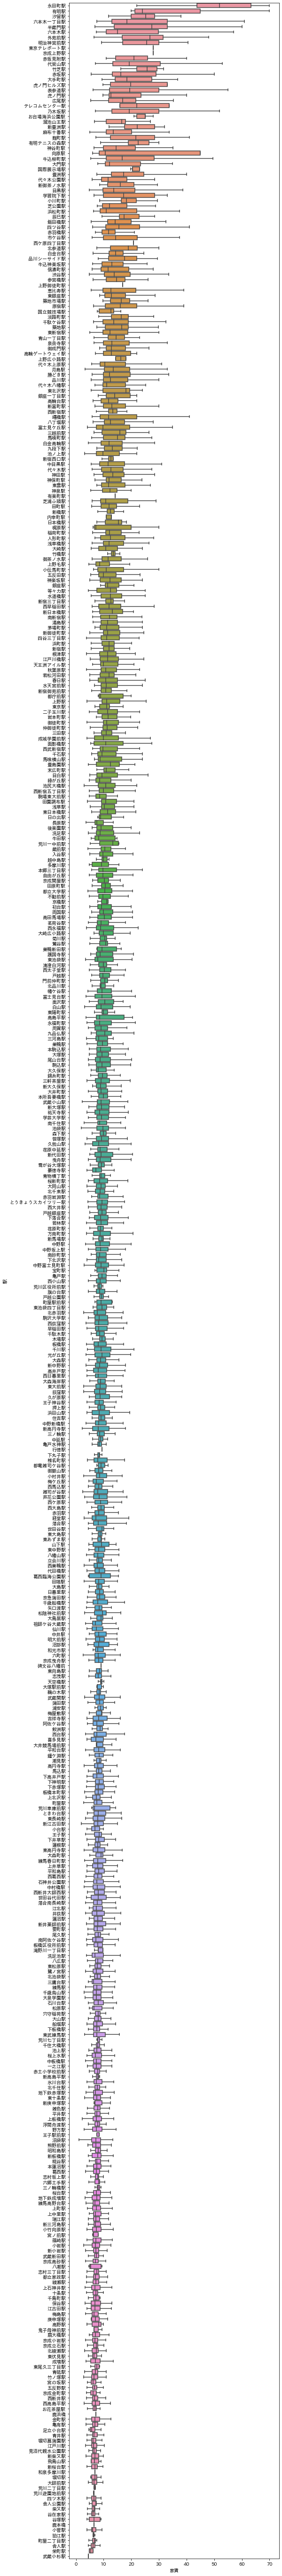

In [147]:
# 駅と賃料の関係
feature = '駅'
order = order_mean(feature, '家賃', 'mean', False)
plt.figure(figsize=(8,100))
sns.boxplot(data=suumo, x='家賃', y=feature, order=order, sym='')
plt.show()

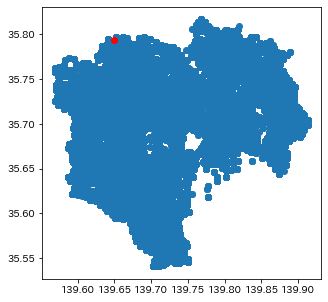

In [66]:
plt.figure(figsize=(5,5))
plt.scatter(suumo['経度'],suumo['緯度'])

station = '西高島平'
condition = station_all['駅'] == station
plt.scatter(station_all.loc[condition, "経度"],station_all.loc[condition,"緯度"],color="red")

plt.show()

In [64]:
station_all

路線  駅番号       駅            住所          経度         緯度
0    つくばエクスプレス  1.0     秋葉原  東京都千代田区神田平河町  139.775650  35.698036
1    つくばエクスプレス  2.0    新御徒町  東京都台東区元浅草1丁目  139.783875  35.708111
2    つくばエクスプレス  3.0      浅草   東京都台東区駒形2丁目  139.795456  35.706589
3    つくばエクスプレス  4.0     南千住  東京都荒川区南千住4丁目  139.802734  35.734295
4    つくばエクスプレス  5.0     北千住    東京都足立区千住旭町  139.807159  35.748875
..         ...  ...     ...           ...         ...        ...
917        NaN  NaN     鐘ケ淵   東京都墨田区墨田5丁目  139.820343  35.738304
918        NaN  NaN    大塚駅前  東京都豊島区南大塚3丁目  139.727066  35.729118
919        NaN  NaN    町屋駅前   東京都荒川区荒川7丁目  139.782242  35.741608
920        NaN  NaN  都電雑司ケ谷  東京都豊島区南池袋4丁目  139.717072  35.722450
921        NaN  NaN  西ケ原四丁目   東京都北区西ケ原4丁目  139.735107  35.743290

[922 rows x 6 columns]

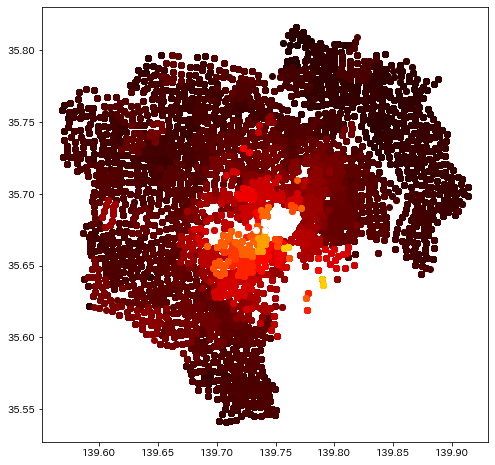

In [139]:
# 賃料平均の優劣で色分け
# ごく少数の駅が破壊している…？
feature = '駅'
order_table = suumo.groupby(feature, as_index=False).mean()[[feature,'家賃']].sort_values('家賃')

max_ = order_table['家賃'].max()
min_ = order_table['家賃'].min()
scale = max_ - min_

plt.figure(figsize=(8,8))
for ku, rent in order_table.values:
    condition = suumo[feature] == ku
    plt.scatter(suumo.loc[condition,'経度'],suumo.loc[condition,'緯度'], color=cm.hot((rent - min_)/scale))

plt.show()

## 歩

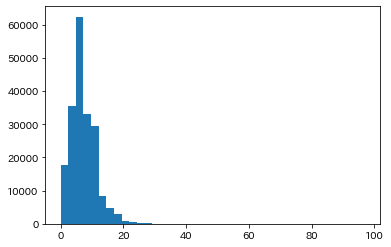

In [183]:
# 極端すぎてどっか行っちゃうあるある
feature = '歩'
plt.hist(suumo[feature], bins=40)
plt.show()

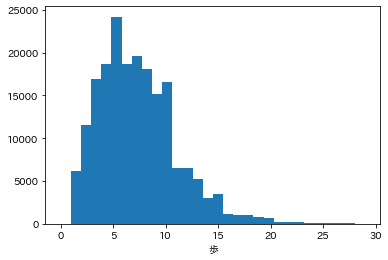

In [125]:
# 目安15分超えるときついんじゃない？知らんけど
feature = '歩'
condition = suumo[feature] < 30
plt.hist(suumo.loc[condition,feature], bins=30)
plt.xlabel('歩')
plt.savefig('./data/image/time_wark_to_station.png')
plt.show()

In [288]:
# 30分を超えるのはさすがに数えるだけしかない
feature = '歩'
condition = suumo[feature] > 30
suumo.loc[condition,'歩']

35337     97
35829     97
40309     32
40345     35
45865     35
52782     31
53533     31
56906     41
57164     32
57449     31
57476     31
85272     43
96690     37
119015    34
150453    32
153176    31
156075    36
156184    36
156190    31
157887    31
157970    31
163892    31
165095    33
165096    34
165121    33
165122    34
165314    31
191865    41
192009    41
192266    41
Name: 歩, dtype: int64

In [291]:
# 最寄り駅まで徒歩97分のやべーやつ
print(suumo.loc[35337,'url'])

https://suumo.jp/chintai/jnc_000064147759/?bc=100297108011


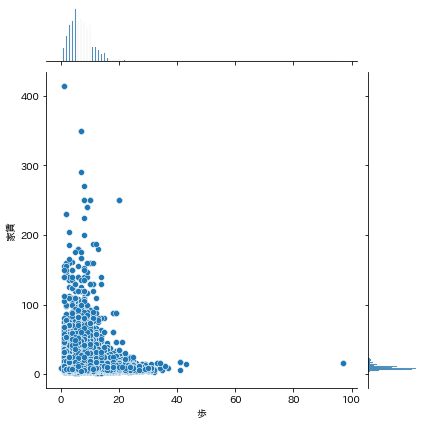

In [184]:
feature = '歩'
sns.jointplot(data=suumo, x=feature, y='家賃')
plt.show()

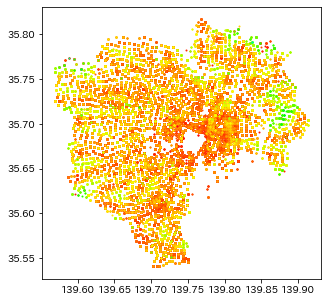

In [185]:
# ザックリ駅がどこにあるかわかる
feature = '歩'
order = sorted(suumo[feature].unique())
max_ = suumo[feature].max()
min_ = suumo[feature].min()
scale = max_ - min_

plt.figure(figsize=(5,5))
for value in order:
    condition = suumo[feature] == value
    plt.scatter(suumo.loc[condition,'経度'],suumo.loc[condition,'緯度'], color=cm.hsv((value-min_)/scale), s=1)
plt.show()

## バス

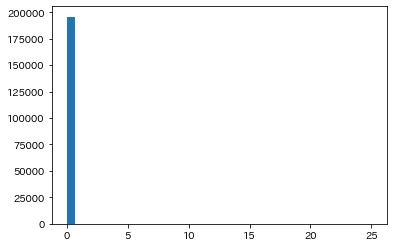

In [186]:
# 極端すぎてどっか行っちゃうあるある
feature = 'バス'
plt.hist(suumo[feature], bins=40)
plt.show()

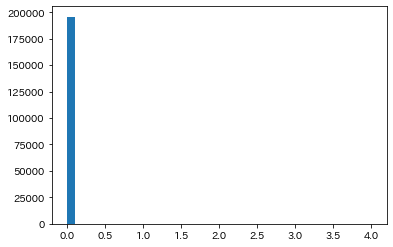

In [292]:
# バス移動している物件が少数なのだ
feature = 'バス'
condition = suumo[feature] < 5
plt.hist(suumo.loc[condition,feature], bins=40)
plt.show()

In [293]:
# バス移動を設定している物件は1％もないのだ。
condition = suumo[feature] == 0
num = suumo.loc[condition,feature].count()
all_ = suumo.shape[0]
print(num,num/all_)

195768 0.9983426231431005


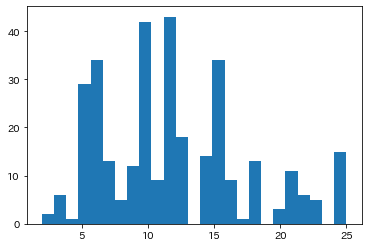

In [301]:
# 5とか10にしてるところが多そう
feature = 'バス'
condition = (suumo[feature] < 30) & (suumo[feature] > 0)
plt.hist(suumo.loc[condition,feature], bins=25)
plt.show()

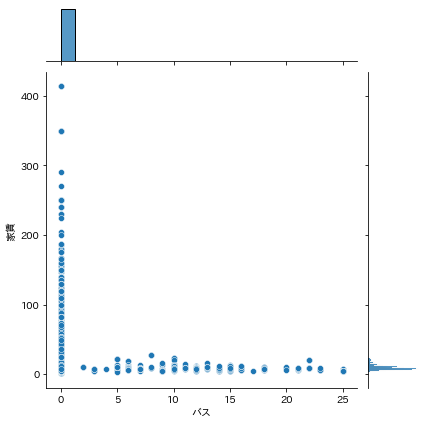

In [187]:
feature = 'バス'
sns.jointplot(data=suumo, x=feature, y='家賃')
plt.show()

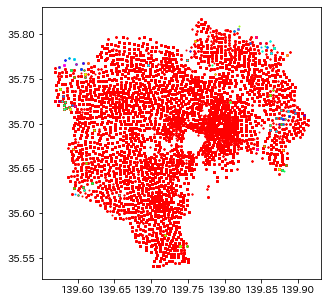

In [188]:
# あるとすれば郊外なのだ
feature = 'バス'
order = sorted(suumo[feature].unique())
max_ = suumo[feature].max()
min_ = suumo[feature].min()
scale = max_ - min_

plt.figure(figsize=(5,5))
for value in order:
    condition = suumo[feature] == value
    plt.scatter(suumo.loc[condition,'経度'],suumo.loc[condition,'緯度'], color=cm.hsv((value-min_)/scale), s=1)
plt.show()

## 車

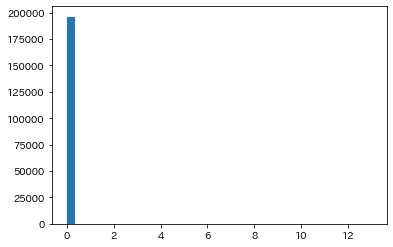

In [189]:
# 極端すぎてどっか行っちゃうあるある
feature = '車'
plt.hist(suumo[feature], bins=40)
plt.show()

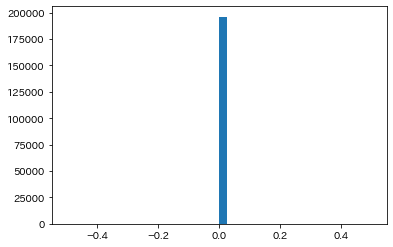

In [302]:
# バス移動している物件が少数なのだ
feature = '車'
condition = suumo[feature] < 5
plt.hist(suumo.loc[condition,feature], bins=40)
plt.show()

In [305]:
# 車移動を設定している物件は1％もないのだ。
condition = suumo[feature] == 0
num = suumo.loc[condition,feature].count()
num2 = suumo.loc[~condition,feature].count()
all_ = suumo.shape[0]
print(num,num2,num/all_)

196089 4 0.9999796015156074


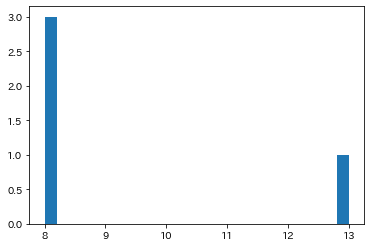

In [306]:
# 8と13しかないの？
feature = '車'
condition = (suumo[feature] < 30) & (suumo[feature] > 0)
plt.hist(suumo.loc[condition,feature], bins=25)
plt.show()

In [307]:
# 車移動を要求する物件とはいったい…
suumo.loc[condition,'車']

67986      8
67987      8
92315      8
140133    13
Name: 車, dtype: int64

In [310]:
# 車移動を要求する物件とはいったい…
print(suumo.loc[67986,'url'])

https://suumo.jp/chintai/jnc_000077358345/?bc=100300513523


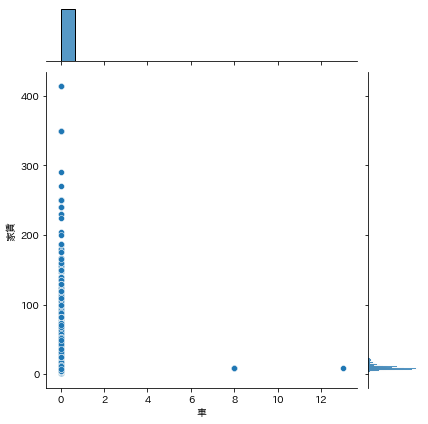

In [190]:
feature = '車'
sns.jointplot(data=suumo, x=feature, y='家賃')
plt.show()

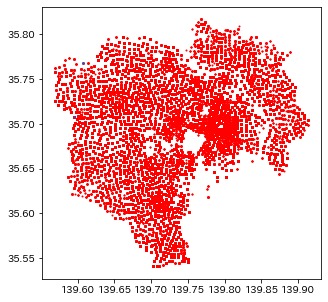

In [191]:
# 左上のほうにわずかに存在する
feature = '車'
order = sorted(suumo[feature].unique())
max_ = suumo[feature].max()
min_ = suumo[feature].min()
scale = max_ - min_

plt.figure(figsize=(5,5))
for value in order:
    condition = suumo[feature] == value
    plt.scatter(suumo.loc[condition,'経度'],suumo.loc[condition,'緯度'], color=cm.hsv((value-min_)/scale), s=1)
plt.show()

## 最寄駅からの距離

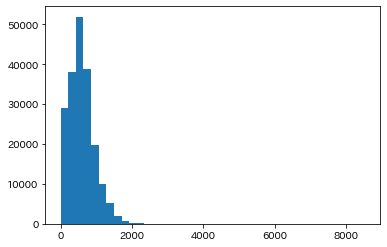

In [192]:
# 極端すぎてどっか行っちゃうあるある
feature = '最寄駅からの距離'
plt.hist(suumo[feature], bins=40)
plt.show()

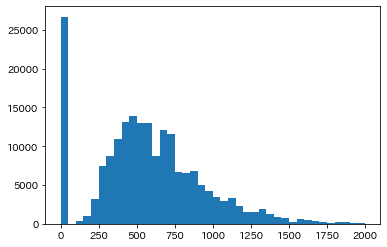

In [314]:
# 駅から500mくらいが多いらしいよ
feature = '最寄駅からの距離'
condition = suumo[feature] < 2000
plt.hist(suumo.loc[condition,feature], bins=40)
plt.show()

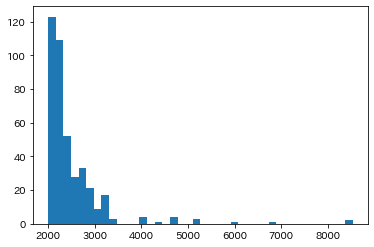

In [312]:
# 最寄駅から８kmの物件とかあるんだ…
feature = '最寄駅からの距離'
condition = suumo[feature] > 2000
plt.hist(suumo.loc[condition,feature], bins=40)
plt.show()

In [313]:
# 駅と同化している物件は割とある
condition = suumo[feature] == 0
num = suumo.loc[condition,feature].count()
num2 = suumo.loc[~condition,feature].count()
all_ = suumo.shape[0]
print(num,num2,num/all_)

26695 169398 0.1361343852151785


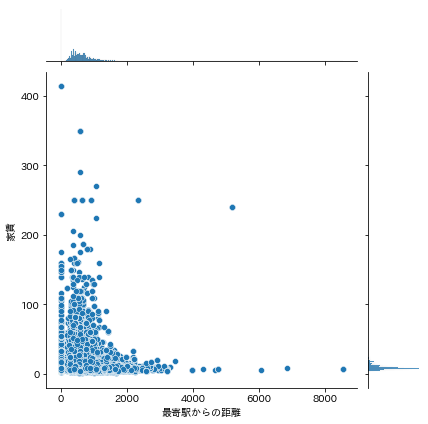

In [193]:
feature = '最寄駅からの距離'
sns.jointplot(data=suumo, x=feature, y='家賃')
plt.show()

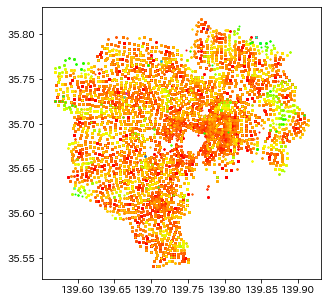

In [194]:
# 歩に似てるよね（当然）
feature = '最寄駅からの距離'
order = sorted(suumo[feature].unique())
max_ = suumo[feature].max()
min_ = suumo[feature].min()
scale = max_ - min_

plt.figure(figsize=(5,5))
for value in order:
    condition = suumo[feature] == value
    plt.scatter(suumo.loc[condition,'経度'],suumo.loc[condition,'緯度'], color=cm.hsv((value-min_)/scale), s=1)
plt.show()

## 間取り

In [100]:
# 間取りは種類
print((suumo['間取り'].unique()))

['42DK' '2LDK' '1LDK' '3LDK' '1' '1K' '1DK' '4LDK' '1SLDK' '2DK' '1SK'
 '2K' '2SLDK' '3SLDK' '5SLDK' '3DK' '1SLK' '1LK' '2SDK' '4SLDK' '2LK'
 '6DK' '12LDK' '6LDK' '6SLDK' '4DK' '1SDK' '4SDK' '3K' '5LDK' '2SK' '3SDK'
 '4K' '4SK' '7SLDK' '5K' '5DK' '7LDK' '5SDK' '6K' '3LK' '12SLDK' '6SK'
 '3SK' '8LDK' '7DK']


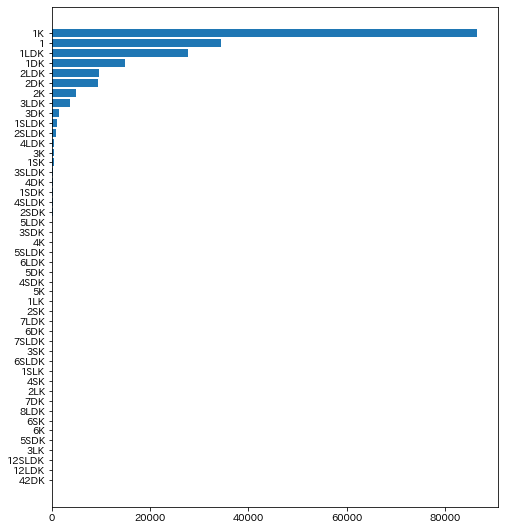

In [87]:
# 各間取りの物件数
# 1kと1(ワンルーム)が圧倒的に多い。
# 北向きは比較的少ないがそれなりにある
feature = '間取り'

height = suumo[feature].unique().shape[0] * (1/5)
width = 8
counts = suumo.groupby(feature, as_index=False).count()[[feature,'SUUMO物件コード']].sort_values('SUUMO物件コード')
plt.figure(figsize=(8,height))
plt.barh(counts[feature],counts['SUUMO物件コード'])
plt.show()

In [89]:
# 全然いないやつも結構いる
feature = '間取り'
counts = suumo.groupby(feature, as_index=False).count()[[feature,'SUUMO物件コード']]
counts.rename(columns = {'SUUMO物件コード':'count'}, inplace=True)
counts['ratio'] = counts['count'] / suumo.shape[0]
counts.sort_values('count')[:20]

間取り  count     ratio
25    42DK      1  0.000005
1    12LDK      1  0.000005
2   12SLDK      1  0.000005
21     3LK      1  0.000005
35    5SDK      1  0.000005
38      6K      1  0.000005
40     6SK      1  0.000005
45    8LDK      2  0.000010
42     7DK      3  0.000015
14     2LK      3  0.000015
30     4SK      3  0.000015
10    1SLK      4  0.000020
41   6SLDK      7  0.000036
23     3SK      9  0.000046
44   7SLDK      9  0.000046
37     6DK     11  0.000056
43    7LDK     11  0.000056
16     2SK     14  0.000071
6      1LK     16  0.000082
33      5K     20  0.000102

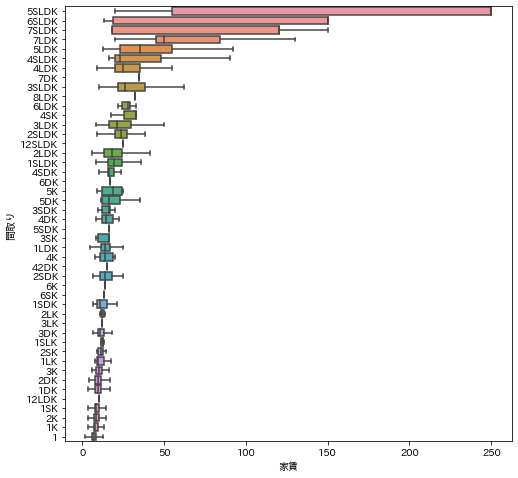

In [92]:
# 間取りと賃料の関係
# 向きによる差はほとんどなさそう
feature = '間取り'
order = order_mean(feature, '家賃', 'mean', False)
plt.figure(figsize=(8,8))
sns.boxplot(data=suumo, x='家賃', y=feature, order=order, sym='')
plt.show()

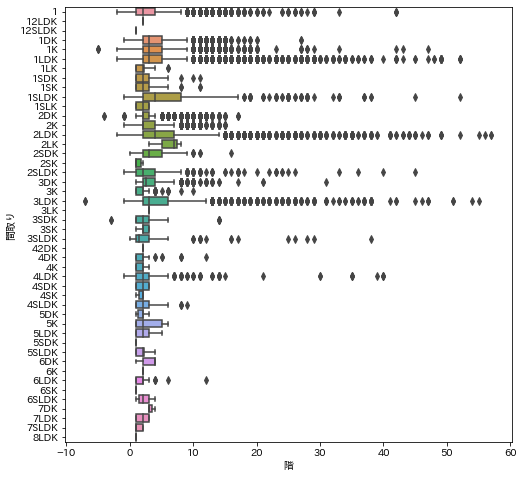

In [99]:
# 間取りと階の関係
# 向きによる差はほとんどなさそう
feature = '間取り'
order = suumo.sort_values('間取り')['間取り'].unique()
plt.figure(figsize=(8,8))
sns.boxplot(data=suumo, x='階', y=feature, order=order,)
plt.show()

array(['1', '12LDK', '12SLDK', '1DK', '1K', '1LDK', '1LK', '1SDK', '1SK',
       '1SLDK', '1SLK', '2DK', '2K', '2LDK', '2LK', '2SDK', '2SK',
       '2SLDK', '3DK', '3K', '3LDK', '3LK', '3SDK', '3SK', '3SLDK',
       '42DK', '4DK', '4K', '4LDK', '4SDK', '4SK', '4SLDK', '5DK', '5K',
       '5LDK', '5SDK', '5SLDK', '6DK', '6K', '6LDK', '6SK', '6SLDK',
       '7DK', '7LDK', '7SLDK', '8LDK'], dtype=object)

## 部屋数

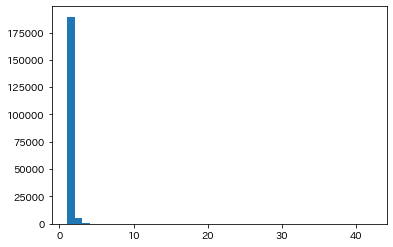

In [196]:
# 極端すぎてどっか行っちゃうあるある
feature = '部屋数'
plt.hist(suumo[feature], bins=40)
plt.show()

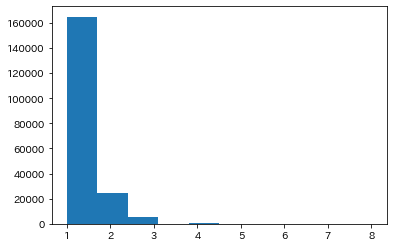

In [317]:
# 大抵は1部屋。3部屋以上はもう珍しい
feature = '部屋数'
condition = suumo[feature] < 10
plt.hist(suumo.loc[condition,feature], bins=10)
plt.show()

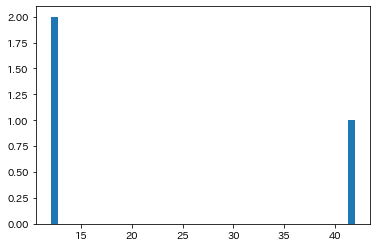

In [319]:
# 42部屋の殿方は何者なの？
feature = '部屋数'
condition = suumo[feature] > 10
plt.hist(suumo.loc[condition,feature], bins=40)
plt.show()

In [322]:
suumo.loc[condition,'部屋数']

0         42
5608      12
127957    12
Name: 部屋数, dtype: int64

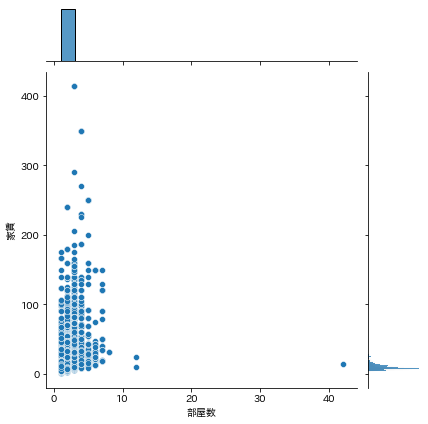

In [197]:
feature = '部屋数'
sns.jointplot(data=suumo, x=feature, y='家賃')
plt.show()

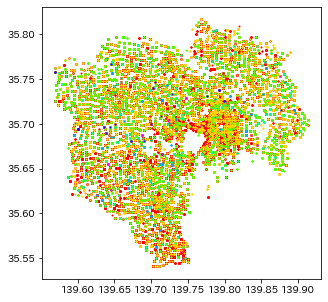

In [324]:
# 地域差なんてない…よな？
feature = '部屋数'
condition = suumo[feature] < 10
order = sorted(suumo.loc[condition,feature].unique())
max_ = suumo.loc[condition,feature].max()
min_ = suumo.loc[condition,feature].min()
scale = max_ - min_

plt.figure(figsize=(5,5))
for value in order:
    condition = suumo[feature] == value
    plt.scatter(suumo.loc[condition,'経度'],suumo.loc[condition,'緯度'], color=cm.hsv((value-min_)/scale), s=1)
plt.show()

## 間取り_S

In [107]:
# 2種類(そらそう)
print((suumo['間取り_S'].unique()))

[0 1]


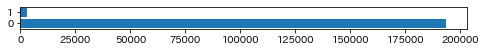

In [123]:
# 駐車場ありますか？
# ない物件が圧倒的
feature = '間取り_S'

height = suumo[feature].unique().shape[0] * (1/5)
width = 8
counts = suumo.groupby(feature, as_index=False).count()[[feature,'SUUMO物件コード']].sort_values('SUUMO物件コード')
plt.figure(figsize=(8,height))
plt.barh(counts[feature],counts['SUUMO物件コード'])
plt.show()

In [124]:
# Sがあるのは1%くらい
feature = '間取り_S'
counts = suumo.groupby(feature, as_index=False).count()[[feature,'SUUMO物件コード']]
counts.rename(columns = {'SUUMO物件コード':'count'}, inplace=True)
counts['ratio'] = counts['count'] / suumo.shape[0]
counts.sort_values('count')[:20]

間取り_S   count     ratio
1      1    2769  0.014121
0      0  193324  0.985879

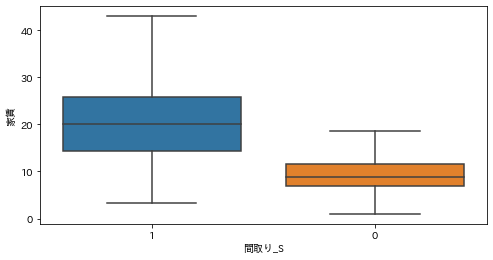

In [127]:
# 間取り_Sと賃料の関係
# 間取り_Sがある方が結構優位
feature = '間取り_S'
order = order_mean(feature, '家賃', 'mean', False)
plt.figure(figsize=(8,4))
sns.boxplot(data=suumo, x=feature, y='家賃', order=order, sym='')
plt.show()

## 間取り_L

In [111]:
# 2種類(そらそう)
print((suumo['間取り_L'].unique()))

[0 1]


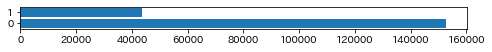

In [112]:
# 駐車場ありますか？
# ない物件のほうが多いけどある物件も結構ある。
feature = '間取り_L'

height = suumo[feature].unique().shape[0] * (1/5)
width = 8
counts = suumo.groupby(feature, as_index=False).count()[[feature,'SUUMO物件コード']].sort_values('SUUMO物件コード')
plt.figure(figsize=(8,height))
plt.barh(counts[feature],counts['SUUMO物件コード'])
plt.show()

In [113]:
# かなり少ないってことはない
feature = '間取り_L'
counts = suumo.groupby(feature, as_index=False).count()[[feature,'SUUMO物件コード']]
counts.rename(columns = {'SUUMO物件コード':'count'}, inplace=True)
counts['ratio'] = counts['count'] / suumo.shape[0]
counts.sort_values('count')[:20]

間取り_L   count     ratio
1      1   43540  0.222038
0      0  152553  0.777962

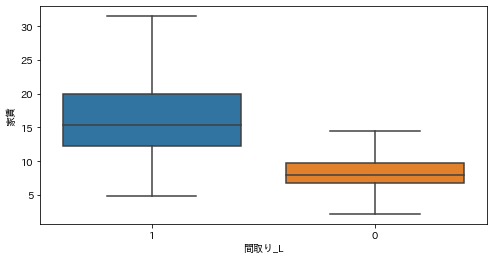

In [114]:
# 間取り_Lと賃料の関係
# 間取り_Lがある方がやや優位
feature = '間取り_L'
order = order_mean(feature, '家賃', 'mean', False)
plt.figure(figsize=(8,4))
sns.boxplot(data=suumo, x=feature, y='家賃', order=order, sym='')
plt.show()

## 間取り_D

In [115]:
# 2種類(そらそう)
print((suumo['間取り_D'].unique()))

[1 0]


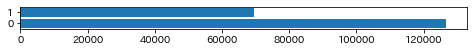

In [128]:
# 駐車場ありますか？
# ない物件のほうが多いけどある物件も結構ある。
feature = '間取り_D'

height = suumo[feature].unique().shape[0] * (1/5)
width = 8
counts = suumo.groupby(feature, as_index=False).count()[[feature,'SUUMO物件コード']].sort_values('SUUMO物件コード')
plt.figure(figsize=(8,height))
plt.barh(counts[feature],counts['SUUMO物件コード'])
plt.show()

In [117]:
# かなり少ないってことはない
feature = '間取り_D'
counts = suumo.groupby(feature, as_index=False).count()[[feature,'SUUMO物件コード']]
counts.rename(columns = {'SUUMO物件コード':'count'}, inplace=True)
counts['ratio'] = counts['count'] / suumo.shape[0]
counts.sort_values('count')[:20]

間取り_D   count     ratio
1      1   69549  0.354674
0      0  126544  0.645326

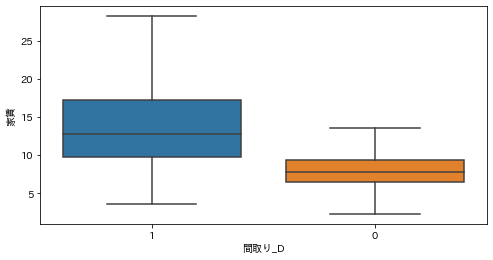

In [129]:
# 間取り_Dと賃料の関係
# 間取り_Dがある方がやや優位
feature = '間取り_D'
order = order_mean(feature, '家賃', 'mean', False)
plt.figure(figsize=(8,4))
sns.boxplot(data=suumo, x=feature, y='家賃', order=order, sym='')
plt.show()

## 間取り_K

In [119]:
# 2種類(そらそう)
print((suumo['間取り_K'].unique()))

[1 0]


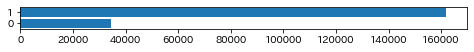

In [120]:
# 駐車場ありますか？
# Kがないのはワンルームでございます。
feature = '間取り_K'

height = suumo[feature].unique().shape[0] * (1/5)
width = 8
counts = suumo.groupby(feature, as_index=False).count()[[feature,'SUUMO物件コード']].sort_values('SUUMO物件コード')
plt.figure(figsize=(8,height))
plt.barh(counts[feature],counts['SUUMO物件コード'])
plt.show()

In [121]:
# かなり少ないってことはない
feature = '間取り_K'
counts = suumo.groupby(feature, as_index=False).count()[[feature,'SUUMO物件コード']]
counts.rename(columns = {'SUUMO物件コード':'count'}, inplace=True)
counts['ratio'] = counts['count'] / suumo.shape[0]
counts.sort_values('count')[:20]

間取り_K   count    ratio
0      0   34381  0.17533
1      1  161712  0.82467

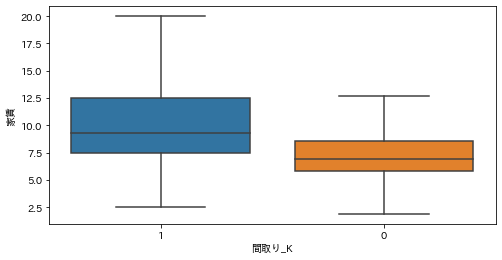

In [130]:
# 間取り_Kと賃料の関係
# 間取り_Kがある方がやや優位（Kがない=ワンルームだからね。仕方ないね）
feature = '間取り_K'
order = order_mean(feature, '家賃', 'mean', False)
plt.figure(figsize=(8,4))
sns.boxplot(data=suumo, x=feature, y='家賃', order=order, sym='')
plt.show()

## 面積

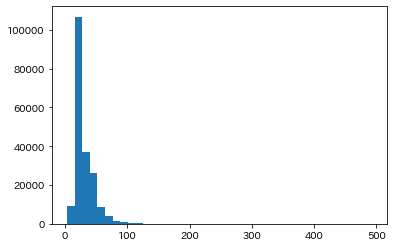

In [199]:
# 極端すぎてどっか行っちゃうあるある
feature = '面積'
plt.hist(suumo[feature], bins=40)
plt.show()

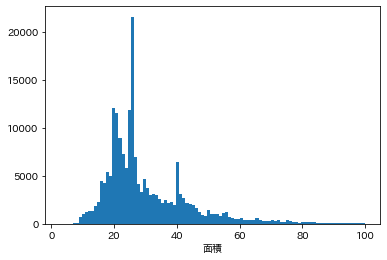

In [132]:
# 25m2 と40m2 調整が多いの？
feature = '面積'
condition = suumo[feature] < 100
plt.hist(suumo.loc[condition,feature], bins=100)
plt.xlabel('面積')
plt.savefig('./data/image/hist_area.png')
plt.show()

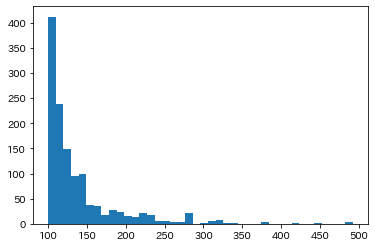

In [329]:
# 500m2 も広くて何をするんでしょうね。
feature = '面積'
condition = suumo[feature] > 100
plt.hist(suumo.loc[condition,feature], bins=40)
plt.show()

In [336]:
# クソ広いのは1-5階全部使えるとかそういう
feature = '面積'
condition = suumo[feature] > 400
suumo.loc[condition,feature]

60480     417.29
65140     449.21
174588    491.88
174739    491.88
174858    491.88
Name: 面積, dtype: float64

In [134]:
print(suumo.loc[127588,'url'])

https://suumo.jp/chintai/jnc_000077581318/?bc=100301436665


In [133]:
suumo.sort_values('面積')['面積']

127588      3.00
49723       3.00
49677       3.00
127269      3.00
187135      4.95
           ...  
60480     417.29
65140     449.21
174858    491.88
174588    491.88
174739    491.88
Name: 面積, Length: 196093, dtype: float64

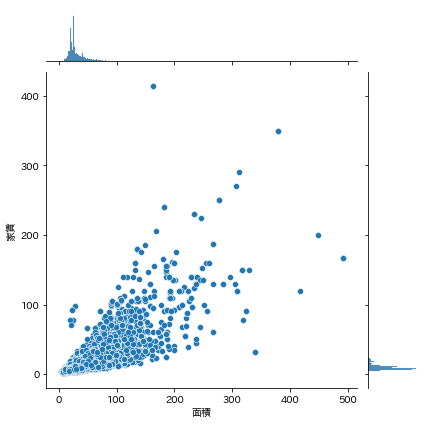

In [338]:
feature = '面積'
sns.jointplot(data=suumo, x=feature, y='家賃')
plt.show()

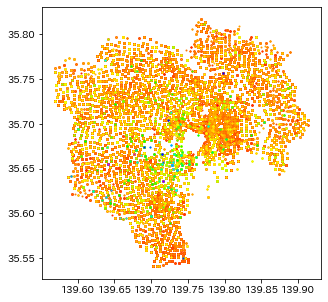

In [201]:
# 港区あたりはクソ広物件多いの？
feature = '面積'
order = sorted(suumo[feature].unique())
max_ = suumo[feature].max()
min_ = suumo[feature].min()
scale = max_ - min_

plt.figure(figsize=(5,5))
for value in order:
    condition = suumo[feature] == value
    plt.scatter(suumo.loc[condition,'経度'],suumo.loc[condition,'緯度'], color=cm.hsv((value-min_)/scale), s=1)
plt.show()

## 築年数

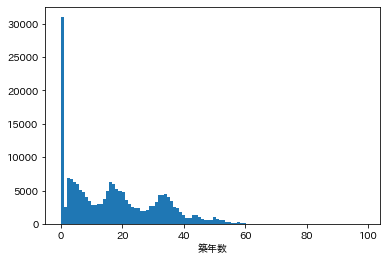

In [135]:
# 0は新築でございます。
feature = '築年数'
plt.hist(suumo[feature], bins=100)
plt.xlabel(feature)
plt.savefig('./data/image/hist_age.png')
plt.show()

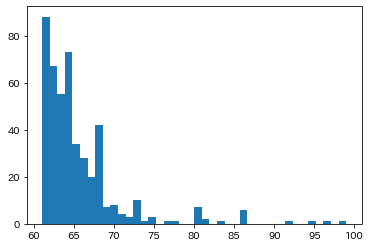

In [340]:
# 60年たっても使える長命物件
feature = '築年数'
condition = suumo[feature] > 60
plt.hist(suumo.loc[condition,feature], bins=40)
plt.show()

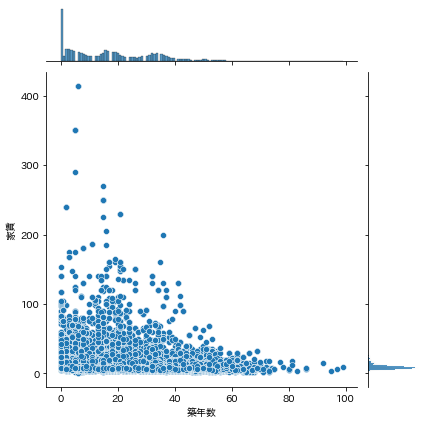

In [203]:
feature = '築年数'
sns.jointplot(data=suumo, x=feature, y='家賃')
plt.show()

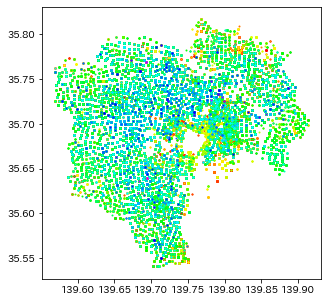

In [348]:
# 若い物件が埋もれている？
# 若い物件ほど表に出てもらうと真っ赤でございました。
feature = '築年数'
order = sorted(suumo[feature].unique())
max_ = suumo[feature].max()
min_ = suumo[feature].min()
scale = max_ - min_

plt.figure(figsize=(5,5))
for value in order:
    condition = suumo[feature] == value
    plt.scatter(suumo.loc[condition,'経度'],suumo.loc[condition,'緯度'], color=cm.hsv((value-min_)/scale), s=1)
plt.show()

## 階数

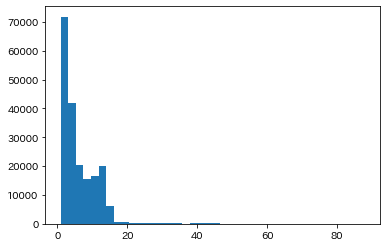

In [205]:
# 15階くらいが目安何ですかね？
feature = '階数'
plt.hist(suumo[feature], bins=40)
plt.show()

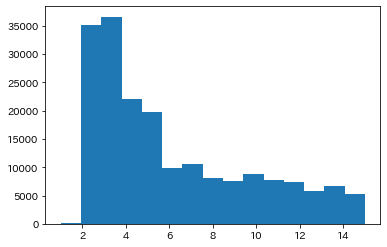

In [353]:
# 60年たっても使える長命物件
feature = '階数'
condition = suumo[feature] < 16
plt.hist(suumo.loc[condition,feature], bins=15)
plt.show()

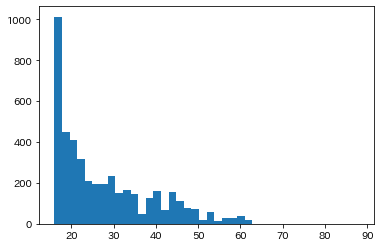

In [355]:
# 90階とかあるんですね…
feature = '階数'
condition = suumo[feature] > 15
plt.hist(suumo.loc[condition,feature], bins=40)
plt.show()

In [356]:
feature = '階数'
condition = suumo[feature] > 70
suumo.loc[condition,feature]

137111    77
140441    88
Name: 階数, dtype: int64

In [359]:
# 88階は88階ではない
print(suumo.loc[140441,'url'])

https://suumo.jp/chintai/jnc_000049494032/?bc=100300484420


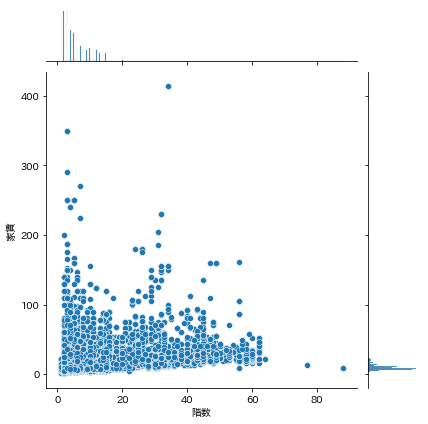

In [206]:
feature = '階数'
sns.jointplot(data=suumo, x=feature, y='家賃')
plt.show()

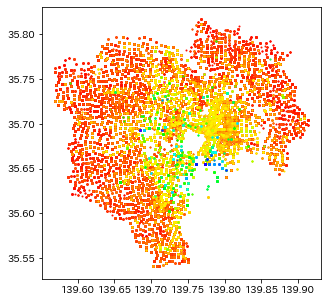

In [207]:
# 超高額物件に比べりゃ大抵の物件はゴミ同然さ
feature = '階数'
order = sorted(suumo[feature].unique())
max_ = suumo[feature].max()
min_ = suumo[feature].min()
scale = max_ - min_

plt.figure(figsize=(5,5))
for value in order:
    condition = suumo[feature] == value
    plt.scatter(suumo.loc[condition,'経度'],suumo.loc[condition,'緯度'], color=cm.hsv((value-min_)/scale), s=1)
plt.show()

## 地下

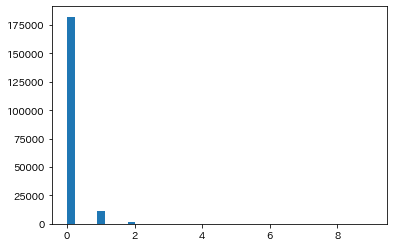

In [208]:
# 極端すぎてどっか行っちゃうあるある
feature = '地下'
plt.hist(suumo[feature], bins=40)
plt.show()

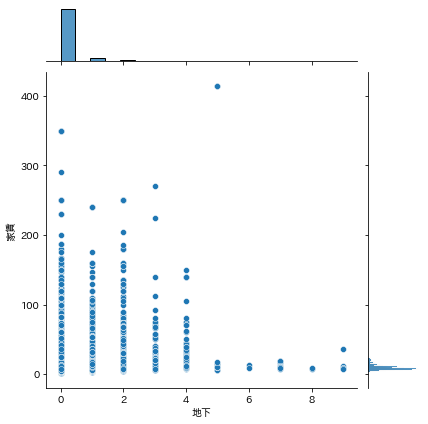

In [209]:
feature = '地下'
sns.jointplot(data=suumo, x=feature, y='家賃')
plt.show()

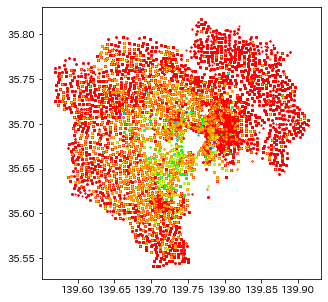

In [210]:
# 地下を作るのはだいたい都心です
feature = '地下'
order = sorted(suumo[feature].unique())
max_ = suumo[feature].max()
min_ = suumo[feature].min()
scale = max_ - min_

plt.figure(figsize=(5,5))
for value in order:
    condition = suumo[feature] == value
    plt.scatter(suumo.loc[condition,'経度'],suumo.loc[condition,'緯度'], color=cm.hsv((value-min_)/scale), s=1)
plt.show()

## 地上

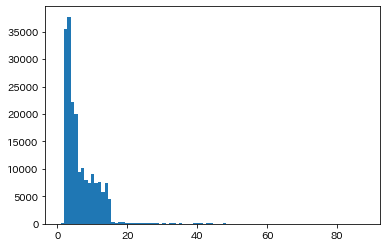

In [109]:
# 極端すぎてどっか行っちゃうあるある
feature = '地上'
plt.hist(suumo[feature], bins=90)
plt.savefig('./data/image/floor_over_ground.png')
plt.show()

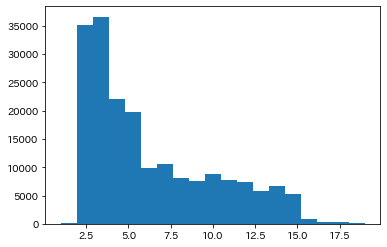

In [110]:
# 15階が目安らしい
feature = '階数'
condition = suumo[feature] < 20
plt.hist(suumo.loc[condition,feature], bins=19)
plt.savefig('./data/image/floor_over_ground_under_20.png')
plt.show()

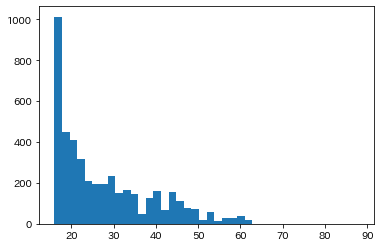

In [355]:
# 90階とかあるんですね…
feature = '階数'
condition = suumo[feature] > 15
plt.hist(suumo.loc[condition,feature], bins=40)
plt.show()

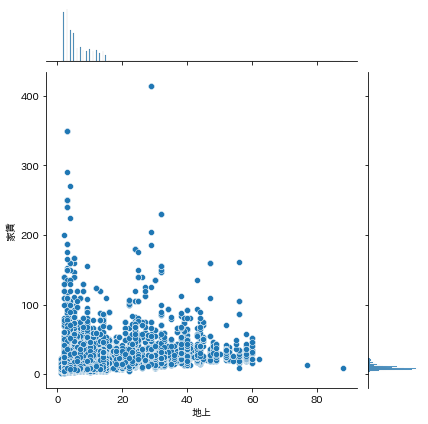

In [212]:
feature = '地上'
sns.jointplot(data=suumo, x=feature, y='家賃')
plt.show()

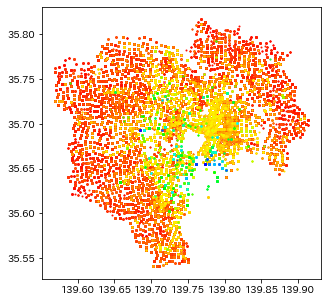

In [213]:
# 都心だけじゃなくて路線に沿っている気がする
feature = '地上'
order = sorted(suumo[feature].unique())
max_ = suumo[feature].max()
min_ = suumo[feature].min()
scale = max_ - min_

plt.figure(figsize=(5,5))
for value in order:
    condition = suumo[feature] == value
    plt.scatter(suumo.loc[condition,'経度'],suumo.loc[condition,'緯度'], color=cm.hsv((value-min_)/scale), s=1)
plt.show()

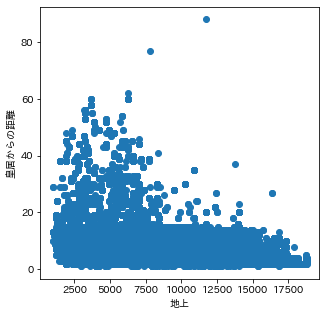

In [123]:
plt.figure(figsize=(5,5))
plt.scatter(suumo['皇居からの距離'],suumo['地上'],)
plt.xlabel('地上')
plt.ylabel('皇居からの距離')
plt.savefig('./data/image/distance_floor.png')
plt.show()

## 階

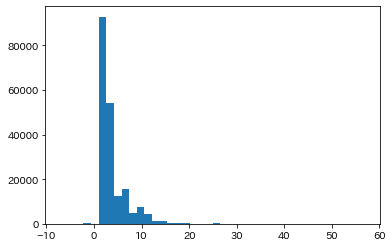

In [214]:
# 極端すぎてどっか行っちゃうあるある
feature = '階'
plt.hist(suumo[feature], bins=40)
plt.show()

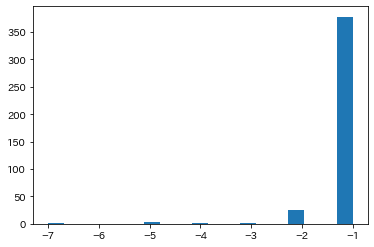

In [363]:
# 地下の居住空間はかなり少ない
feature = '階'
condition = suumo[feature] < 0
plt.hist(suumo.loc[condition,feature], bins=19)
plt.show()

In [365]:
feature = '階'
condition = suumo[feature] < -5
suumo.loc[condition,feature]

167980   -7.0
167981   -7.0
Name: 階, dtype: float64

In [366]:
print(suumo.loc[167980,'url'])

https://suumo.jp/chintai/jnc_000056995099/?bc=100300853525


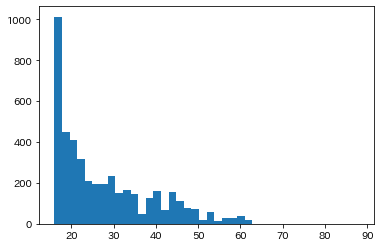

In [355]:
# 90階とかあるんですね…
feature = '階数'
condition = suumo[feature] > 15
plt.hist(suumo.loc[condition,feature], bins=40)
plt.show()

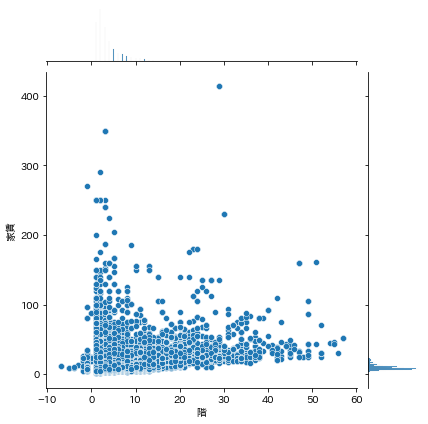

In [215]:
feature = '階'
sns.jointplot(data=suumo, x=feature, y='家賃')
plt.show()

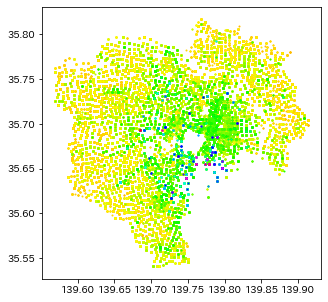

In [216]:
# 超高層ビルは皇居周辺とか東京湾沿いとか
feature = '階'
order = sorted(suumo[feature].unique())
max_ = suumo[feature].max()
min_ = suumo[feature].min()
scale = max_ - min_

plt.figure(figsize=(5,5))
for value in order:
    condition = suumo[feature] == value
    plt.scatter(suumo.loc[condition,'経度'],suumo.loc[condition,'緯度'], color=cm.hsv((value-min_)/scale), s=1)
plt.show()

## 向き

In [54]:
# 向きは9種類
# '-'って何でしょうね
print((suumo['向き'].unique()))

['南西' '北' '西' '南' '北東' '東' '北西' '-' '南東']


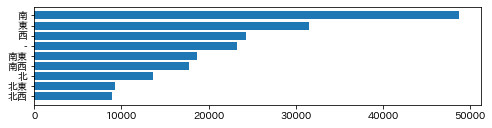

In [55]:
# 各向きの物件数
# 南が圧倒的に多い。
# 北向きは比較的少ないがそれなりにある
feature = '向き'

height = suumo[feature].unique().shape[0] * (1/5)
width = 8
counts = suumo.groupby(feature, as_index=False).count()[[feature,'SUUMO物件コード']].sort_values('SUUMO物件コード')
plt.figure(figsize=(8,height))
plt.barh(counts[feature],counts['SUUMO物件コード'])
plt.show()

In [56]:
# 全然いないってことはない
feature = '向き'
counts = suumo.groupby(feature, as_index=False).count()[[feature,'SUUMO物件コード']]
counts.rename(columns = {'SUUMO物件コード':'count'}, inplace=True)
counts['ratio'] = counts['count'] / suumo.shape[0]
counts.sort_values('count')[:20]

向き  count     ratio
3  北西   8925  0.045514
2  北東   9295  0.047401
1   北  13609  0.069401
6  南西  17760  0.090569
5  南東  18718  0.095455
0   -  23220  0.118413
8   西  24306  0.123951
7   東  31492  0.160597
4   南  48768  0.248698

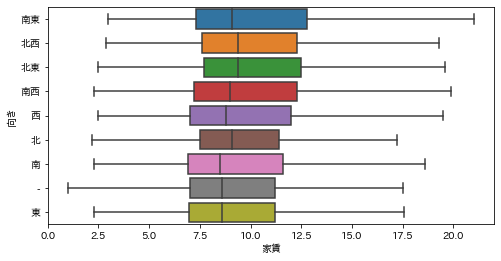

In [63]:
# 向きと賃料の関係
# 向きによる差はほとんどなさそう
feature = '向き'
order = order_mean(feature, '家賃', 'mean', False)
plt.figure(figsize=(8,4))
sns.boxplot(data=suumo, x='家賃', y=feature, order=order, sym='')
plt.show()

## 建物種別

In [11]:
# 向きは9種類
# '-'って何でしょうね
print((suumo['建物種別'].unique()))

['アパート' 'マンション' 'テラス・タウンハウス' '一戸建て' 'その他']


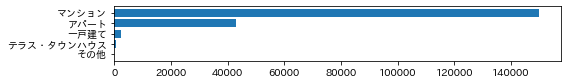

In [12]:
# 各向きの物件数
# 南が圧倒的に多い。
# 北向きは比較的少ないがそれなりにある
feature = '建物種別'

height = suumo[feature].unique().shape[0] * (1/5)
width = 8
counts = suumo.groupby(feature, as_index=False).count()[[feature,'SUUMO物件コード']].sort_values('SUUMO物件コード')
plt.figure(figsize=(8,height))
plt.barh(counts[feature],counts['SUUMO物件コード'])
plt.show()

In [13]:
# 全然いないってことはない
feature = '建物種別'
counts = suumo.groupby(feature, as_index=False).count()[[feature,'SUUMO物件コード']]
counts.rename(columns = {'SUUMO物件コード':'count'}, inplace=True)
counts['ratio'] = counts['count'] / suumo.shape[0]
counts.sort_values('count')[:20]

建物種別   count     ratio
0         その他      50  0.000255
2  テラス・タウンハウス     715  0.003646
4        一戸建て    2454  0.012514
1        アパート   42852  0.218529
3       マンション  150022  0.765055

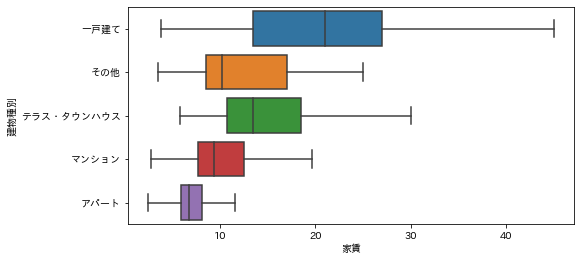

In [14]:
# 向きと賃料の関係
# 向きによる差はほとんどなさそう
feature = '建物種別'
order = order_mean(feature, '家賃', 'mean', False)
plt.figure(figsize=(8,4))
sns.boxplot(data=suumo, x='家賃', y=feature, order=order, sym='')
plt.show()

## オプション

In [16]:
# オプションリスト
option_list = []
for i in range(suumo.shape[0]):
    option_room = suumo.loc[i,'オプション'].strip().split('、')
    for option in option_room:
        option_list.append(option)
pd.DataFrame(option_list,columns=['オプション'])['オプション'].value_counts()

エアコン                 184314
室内洗濯置                172909
バストイレ別               164941
フローリング               158822
都市ガス                 154919
                      ...  
短期解約違約金                   1
親子扉                       1
定期借家 西暦2024年12月まで         1
LDK2ヶ所                    1
9.35万円                    1
Name: オプション, Length: 496, dtype: int64

In [17]:
df_option = pd.DataFrame(option_list,columns=['オプション'])
df_option_counts = df_option['オプション'].value_counts().rename_axis('unique_values').reset_index(name='counts')

In [20]:
# 出てきたオプションとその数
# condition = df_option_counts['counts'] < 100
df_option_counts[:50]

unique_values  counts
0           エアコン  184314
1          室内洗濯置  172909
2         バストイレ別  164941
3         フローリング  158822
4           都市ガス  154919
5       シューズボックス  149054
6          バルコニー  148287
7          クロゼット  136243
8       TVインターホン  130156
9       システムキッチン  126377
10        オートロック  126179
11           駐輪場  124498
12        温水洗浄便座  121876
13       ガスコンロ対応  119409
14         洗面所独立  117022
15         保証人不要  115267
16       3駅以上利用可  112712
17          即入居可  107602
18         浴室乾燥機  107167
19      駅徒歩10分以内  104146
20        宅配ボックス  103125
21        エレベーター   99155
22         2口コンロ   97691
23      敷地内ごみ置き場   97377
24    初期費用カード決済可   94523
25        2沿線利用可   90450
26        光ファイバー   89827
27           角住戸   87790
28         洗面化粧台   84217
29         防犯カメラ   81741
30      3沿線以上利用可   75982
31         敷金1ヶ月   75142
32     IT重説 対応物件   74990
33           脱衣所   72878
34         2駅利用可   71645
35       駅徒歩5分以内   70156
36          CATV   68151
37     全居室フローリング   68054
38          礼金不要   67229
39         保証金不要   61907
40         礼金1ヶ月   61162
41        追焚機能浴室   60176
42            BS   59216
43      ネット使用料不要   57063
44    24時間換気システム   56244
45       高速ネット対応   55085
46       保証会社利用可   52176
47       外壁タイル張り   51398
48          2面採光   51102
49          敷金不要   48739

In [21]:
suumo.shape[0]

196093

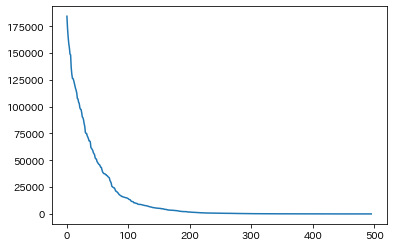

In [569]:
plt.plot(df_option_counts['counts'])

In [565]:
condition = suumo['オプション'].str.contains('光触媒塗装')
suumo.loc[condition,'オプション']

53159     \nバストイレ別、バルコニー、エアコン、フローリング、TVインターホン、浴室乾燥機、オートロ...
53185     \nバストイレ別、バルコニー、エアコン、フローリング、TVインターホン、浴室乾燥機、オートロ...
164093    \nバストイレ別、エアコン、オートロック、南向き、角住戸、エレベーター、駐輪場、外壁タイル張...
Name: オプション, dtype: object

In [567]:
print(suumo.loc[164093,'url'])

https://suumo.jp/chintai/jnc_000065572117/?bc=100230262409


In [ ]:
# このオプションありますか？変数を生成したい

## オプション数

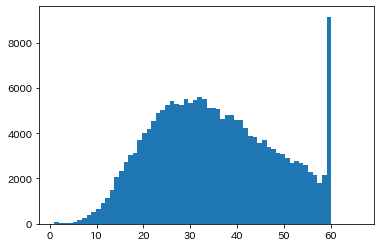

In [379]:
# 割となだらかに広がっている
# オプションは60個が上限？
feature = 'オプション数'
plt.hist(suumo[feature], bins=66)
plt.show()

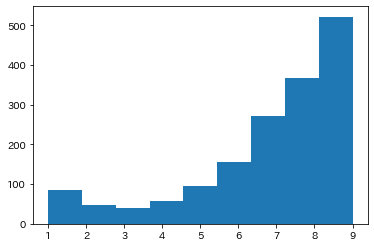

In [377]:
# 地下の居住空間はかなり少ない
feature = 'オプション数'
condition = suumo[feature] < 10
plt.hist(suumo.loc[condition,feature], bins=9)
plt.show()

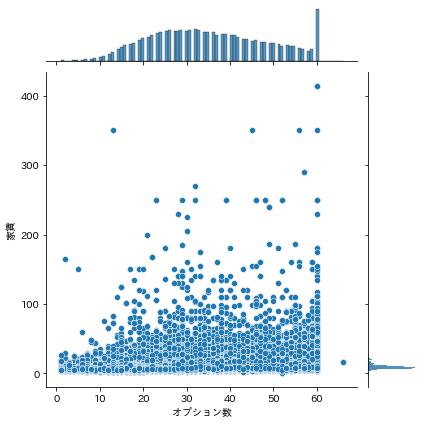

In [218]:
# オプションも多けりゃその分高いってわけでもない
feature = 'オプション数'
sns.jointplot(data=suumo, x=feature, y='家賃')
plt.show()

In [27]:
suumo.sort_values('家賃', ascending=False)[['家賃','オプション数']]

家賃  オプション数
168127  413.96      60
168262  413.96      60
68      350.00      60
67      350.00      45
69      350.00      13
...        ...     ...
149127    1.90      28
162706    1.90      14
165171    1.50      10
192267    1.00      52
191971    1.00      52

[196093 rows x 2 columns]

In [29]:
print(suumo.loc[192267,'url'])

https://suumo.jp/chintai/jnc_000074894730/?bc=100205729340


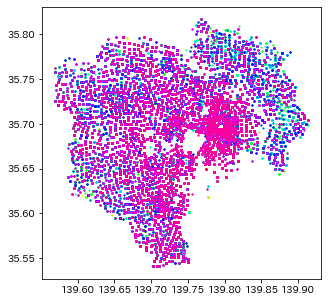

In [378]:
# オプションの数って不動産会社の匙加減なんじゃない？
feature = 'オプション数'
order = sorted(suumo[feature].unique())
max_ = suumo[feature].max()
min_ = suumo[feature].min()
scale = max_ - min_

plt.figure(figsize=(5,5))
for value in order:
    condition = suumo[feature] == value
    plt.scatter(suumo.loc[condition,'経度'],suumo.loc[condition,'緯度'], color=cm.hsv((value-min_)/scale), s=1)
plt.show()

## 構造

In [70]:
# 構造は10種類
print((suumo['構造'].unique()))

['木造' '鉄骨' '鉄筋コン' '軽量鉄骨' '鉄骨鉄筋' '気泡コン' 'その他' 'プレコン' '鉄骨プレ' 'ブロック']


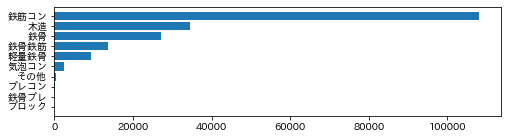

In [71]:
# 各向きの物件数

feature = '構造'

height = suumo[feature].unique().shape[0] * (1/5)
width = 8
counts = suumo.groupby(feature, as_index=False).count()[[feature,'SUUMO物件コード']].sort_values('SUUMO物件コード')
plt.figure(figsize=(8,height))
plt.barh(counts[feature],counts['SUUMO物件コード'])
plt.show()

In [72]:
# かなり少ない構造もある
feature = '構造'
counts = suumo.groupby(feature, as_index=False).count()[[feature,'SUUMO物件コード']]
counts.rename(columns = {'SUUMO物件コード':'count'}, inplace=True)
counts['ratio'] = counts['count'] / suumo.shape[0]
counts.sort_values('count')[:20]

構造   count     ratio
1  ブロック      20  0.000102
8  鉄骨プレ      52  0.000265
2  プレコン     162  0.000826
0   その他     576  0.002937
4  気泡コン    2477  0.012632
5  軽量鉄骨    9427  0.048074
9  鉄骨鉄筋   13639  0.069554
7    鉄骨   27091  0.138154
3    木造   34549  0.176187
6  鉄筋コン  108100  0.551269

In [5]:
pd.crosstab(suumo['構造'],suumo['建物種別'])

建物種別  その他   アパート  テラス・タウンハウス   マンション  一戸建て
構造                                        
その他     0    154           8     410     4
ブロック    0      4           0      16     0
プレコン    0      0           0     162     0
木造     13  31785         500       0  2251
気泡コン    2     55           0    2415     5
軽量鉄骨    2   9055         149     154    67
鉄筋コン   27    228          32  107772    41
鉄骨      6   1544          26   25430    85
鉄骨プレ    0      3           0      48     1
鉄骨鉄筋    0     24           0   13615     0

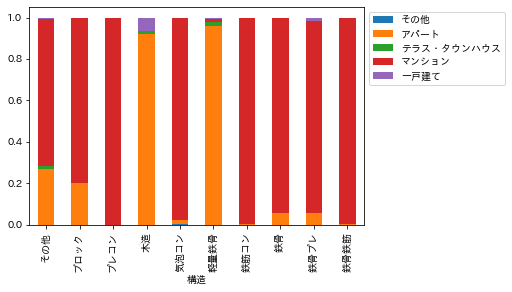

In [82]:
crosstab = pd.crosstab(suumo['構造'],suumo['建物種別'], normalize="index")
crosstab.plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1,1))
plt.savefig('./data/image/type_create_table.png')
plt.show()

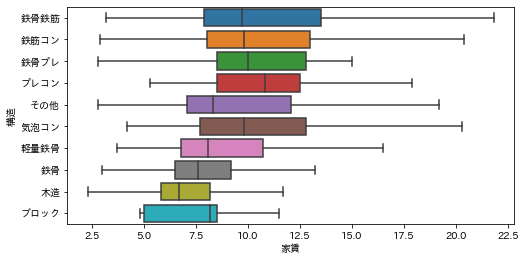

In [74]:
# 構造と賃料の関係
# 鉄骨鉄金はタワマンやオフィスビルに用いられる。そら高くなる。
# プレコンとは事前に工場で製造したコンクリートを利用すること。コスト面で優秀
feature = '構造'
order = order_mean(feature, '家賃', 'mean', False)
plt.figure(figsize=(8,4))
sns.boxplot(data=suumo, x='家賃', y=feature, order=order, sym='')
plt.show()

## 駐車場有無

In [100]:
# 2種類(そらそう)
print((suumo['駐車場有無'].unique()))

[0 1]


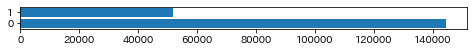

In [101]:
# 駐車場ありますか？
# ない物件のほうが多いけどある物件も結構ある。
# 都内じゃなければかなり変わりそうね。
feature = '駐車場有無'

height = suumo[feature].unique().shape[0] * (1/5)
width = 8
counts = suumo.groupby(feature, as_index=False).count()[[feature,'SUUMO物件コード']].sort_values('SUUMO物件コード')
plt.figure(figsize=(8,height))
plt.barh(counts[feature],counts['SUUMO物件コード'])
plt.show()

In [104]:
# かなり少ないってことはない
feature = '駐車場有無'
counts = suumo.groupby(feature, as_index=False).count()[[feature,'SUUMO物件コード']]
counts.rename(columns = {'SUUMO物件コード':'count'}, inplace=True)
counts['ratio'] = counts['count'] / suumo.shape[0]
counts.sort_values('count')[:20]

駐車場有無   count     ratio
1      1   51734  0.263824
0      0  144359  0.736176

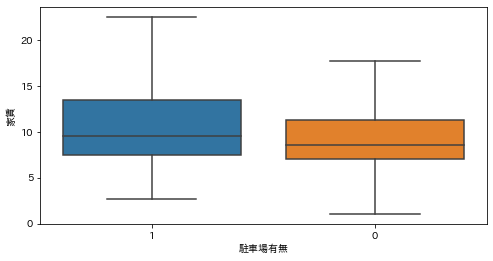

In [106]:
# 駐車場有無と賃料の関係
# 駐車場がある方がやや優位
feature = '駐車場有無'
order = order_mean(feature, '家賃', 'mean', False)
plt.figure(figsize=(8,4))
sns.boxplot(data=suumo, x=feature, y='家賃', order=order, sym='')
plt.show()

## 駐車場距離

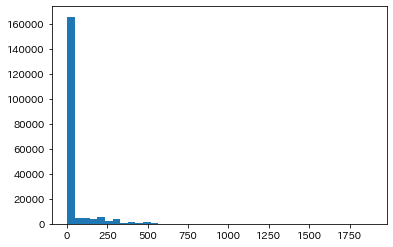

In [380]:
# 極端すぎてどっか行っちゃうあるある
# 距離0は駐車場がない場合もあるので注意
feature = '駐車場距離'
plt.hist(suumo[feature], bins=40)
plt.show()

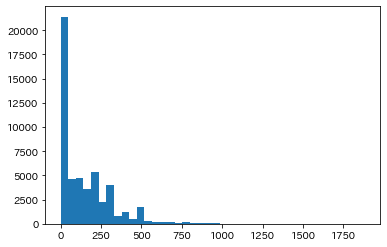

In [381]:
# 極端すぎてどっか行っちゃうあるある
# 駐車場がないやつを弾く
feature = '駐車場距離'
condition = suumo['駐車場有無'] == 1
plt.hist(suumo.loc[condition,feature], bins=40)
plt.show()

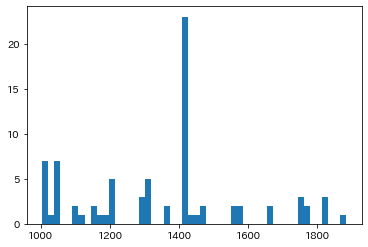

In [384]:
# 駐車場まで1㎞以上歩くんですか…？
feature = '駐車場距離'
condition = suumo[feature] > 1000
plt.hist(suumo.loc[condition,feature], bins=50)
plt.show()

In [385]:
condition = suumo[feature] > 1000
suumo.loc[condition,'駐車場距離']

2415      1198
4423      1022
5155      1751
5174      1751
6709      1020
          ... 
145770    1010
146109    1010
162400    1100
162402    1100
162499    1019
Name: 駐車場距離, Length: 79, dtype: int64

In [392]:
# 駐車場遠い…遠くない？
print(suumo.loc[6709,'url'])

https://suumo.jp/chintai/jnc_000076377241/?bc=100290116930


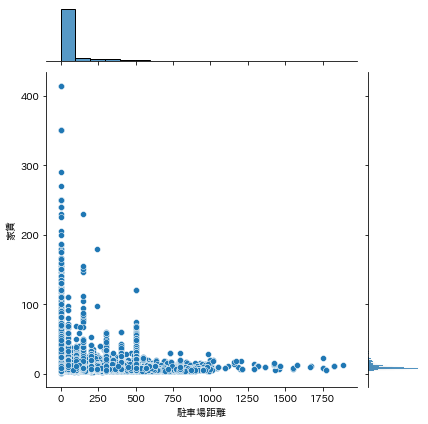

In [221]:
feature = '駐車場距離'
sns.jointplot(data=suumo, x=feature, y='家賃')
plt.show()

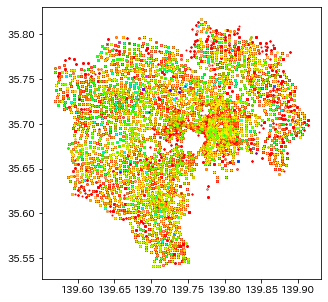

In [222]:
# 超高額物件に比べりゃ大抵の物件はゴミ同然さ
feature = '駐車場距離'
order = sorted(suumo[feature].unique())
max_ = suumo[feature].max()
min_ = suumo[feature].min()
scale = max_ - min_

plt.figure(figsize=(5,5))
for value in order:
    condition = suumo[feature] == value
    plt.scatter(suumo.loc[condition,'経度'],suumo.loc[condition,'緯度'], color=cm.hsv((value-min_)/scale), s=1)
plt.show()

## 駐車場料金

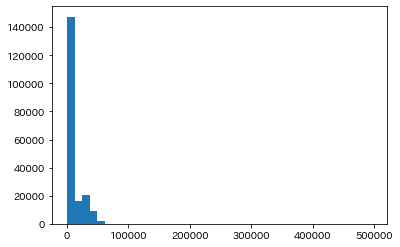

In [223]:
# 極端すぎてどっか行っちゃうあるある
feature = '駐車場料金'
plt.hist(suumo[feature], bins=40)
plt.show()

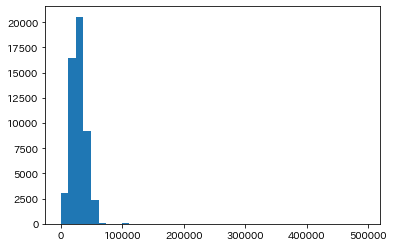

In [393]:
# 極端すぎてどっか行っちゃうあるある
# 駐車場がないやつを弾く
feature = '駐車場料金'
condition = suumo['駐車場有無'] == 1
plt.hist(suumo.loc[condition,feature], bins=40)
plt.show()

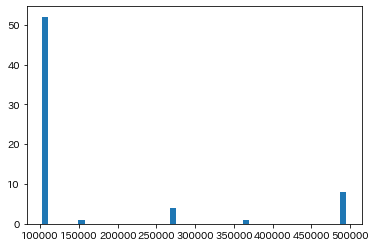

In [399]:
# 駐車場だけで50万ですか…
feature = '駐車場料金'
condition = suumo[feature] > 100000
plt.hist(suumo.loc[condition,feature], bins=50)
plt.show()

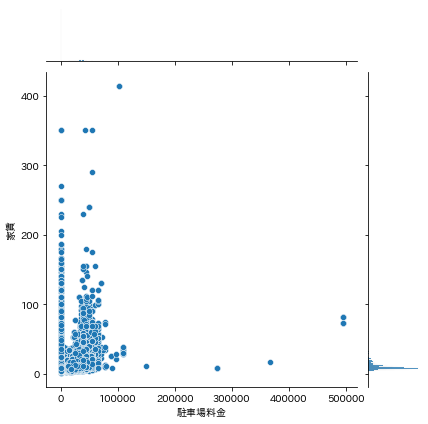

In [224]:
feature = '駐車場料金'
sns.jointplot(data=suumo, x=feature, y='家賃')
plt.show()

In [401]:
condition = suumo[feature] > 400000
suumo.loc[condition,'駐車場料金']

192586    495000
192587    495000
192678    495000
192679    495000
192942    495000
192943    495000
193386    495000
193387    495000
Name: 駐車場料金, dtype: int64

In [403]:
# 駐車場遠い…遠くない？
print(suumo.loc[192586,'url'])

https://suumo.jp/chintai/jnc_000077509746/?bc=100300945121


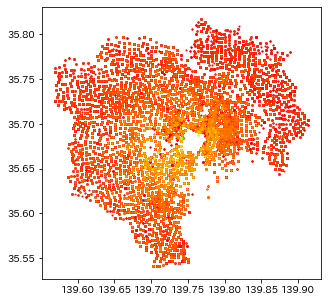

In [225]:
# 超高額物件に比べりゃ大抵の物件はゴミ同然さ
feature = '駐車場料金'
order = sorted(suumo[feature].unique())
max_ = suumo[feature].max()
min_ = suumo[feature].min()
scale = max_ - min_

plt.figure(figsize=(5,5))
for value in order:
    condition = suumo[feature] == value
    plt.scatter(suumo.loc[condition,'経度'],suumo.loc[condition,'緯度'], color=cm.hsv((value-min_)/scale), s=1)
plt.show()

## 入居

In [96]:
# 入居は3種類
print((suumo['入居'].unique()))

['即' '待ち' '相談']


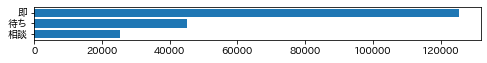

In [81]:
# 各入居の物件数
# すぐには入れる物件が多い
feature = '入居'

height = suumo[feature].unique().shape[0] * (1/5)
width = 8
counts = suumo.groupby(feature, as_index=False).count()[[feature,'SUUMO物件コード']].sort_values('SUUMO物件コード')
plt.figure(figsize=(8,height))
plt.barh(counts[feature],counts['SUUMO物件コード'])
plt.show()

In [85]:
# かなり少ないってことはない
feature = '入居'
counts = suumo.groupby(feature, as_index=False).count()[[feature,'SUUMO物件コード']]
counts.rename(columns = {'SUUMO物件コード':'count'}, inplace=True)
counts['ratio'] = counts['count'] / suumo.shape[0]
counts.sort_values('count')[:20]

入居   count     ratio
2  相談   25377  0.129413
1  待ち   45153  0.230263
0   即  125563  0.640324

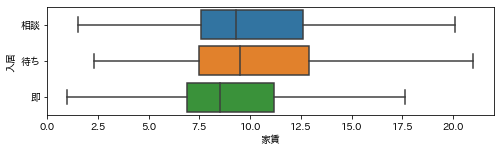

In [86]:
# 入居と賃料の関係
# すぐ入れる物件が比較的安いらしい。早く売りたいから値下げしてたりする？
feature = '入居'
order = order_mean(feature, '家賃', 'mean', False)
plt.figure(figsize=(8,2))
sns.boxplot(data=suumo, x='家賃', y=feature, order=order, sym='')
plt.show()

## 取引態様

In [91]:
# 入居は3種類
print((suumo['取引態様'].unique()))

['貸主' '仲介' '代理']


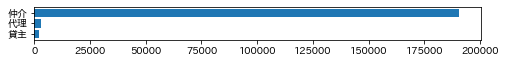

In [92]:
# 大半は仲介でありんす
feature = '取引態様'

height = suumo[feature].unique().shape[0] * (1/5)
width = 8
counts = suumo.groupby(feature, as_index=False).count()[[feature,'SUUMO物件コード']].sort_values('SUUMO物件コード')
plt.figure(figsize=(8,height))
plt.barh(counts[feature],counts['SUUMO物件コード'])
plt.show()

In [93]:
# 大半は仲介でありんす
feature = '取引態様'
counts = suumo.groupby(feature, as_index=False).count()[[feature,'SUUMO物件コード']]
counts.rename(columns = {'SUUMO物件コード':'count'}, inplace=True)
counts['ratio'] = counts['count'] / suumo.shape[0]
counts.sort_values('count')[:20]

取引態様   count     ratio
2   貸主    2343  0.011948
0   代理    3119  0.015906
1   仲介  190631  0.972146

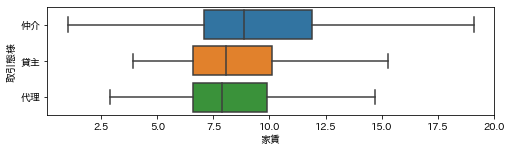

In [95]:
# 特段相場が変わることはなさそう？
feature = '取引態様'
order = order_mean(feature, '家賃', 'mean', False)
plt.figure(figsize=(8,2))
sns.boxplot(data=suumo, x='家賃', y=feature, order=order, sym='')
plt.show()

## 条件

In [497]:
# 条件変数の中身
# フリーレント+条件がかなり多い
condition_list = []
for i in range(suumo.shape[0]):
    condition_list_room = suumo.loc[i,'条件'].split('/')
    for cond in condition_list_room:
        condition_list.append(cond)
df_condition = pd.DataFrame(condition_list,columns=['条件'])

In [499]:
# フリーレント?カ月 (条件) を圧縮する
condition = df_condition['条件'].map(lambda x: search_object('フリーレント[0-9]+ヶ月',x))
df_condition.loc[condition,'条件'] = df_condition.loc[condition,'条件'].map(lambda x: re.search('(フリーレント[0-9]*?ヶ月)(.*?)',x).group(1))

In [504]:
# フリーレント?月から を1つに圧縮する
condition = df_condition['条件'].map(lambda x: search_object('フリーレント[0-9]*?月から',x))
df_condition.loc[condition,'条件'] = 'フリーレント[0-9]*?月から'

In [518]:
# その他にぶち込むリスト
condition_other = [ '1年未満解約時違約金有', '09','30迄※詳細はお問い合わせください','31迄※詳細はお問い合わせください',
                   '10','2年未満解約時、FR期間相当額の違約金あり※詳細はお問い合わせ下さい',
       '違約金有り', '法人限定', '2末まで', '２年未満解約時違約金1ヶ', '末迄',
       '1年未満解約は違約金あり', '1年未満解約時違約金有り\u3000※詳細はお問い合わせください', '1ヶ月分)',
       '31までフリーレント！', '高齢者歓迎', '対象期間:当月+翌月分', '30申し込み迄',
       '30までに契約の場合  短期違約金あり', '末までの契約開始に限る', '対象期間：当月+翌月分', '楽器相談(ピアノ可)',
       '事務所不可', '01から賃料発生', '10までの契約締結、始期日に限る', ]

In [519]:
# 謎の皆さんはその他に変えてしまいましょう
for other in condition_other:
    condition = df_condition['条件'] == other
    df_condition[condition] = 'その他'

In [521]:
df_condition['条件'].value_counts()

-                   71782
二人入居可               54652
ペット相談               39289
単身者可                33251
事務所利用不可             21720
子供可                 17079
フリーレント1ヶ月           12210
ルームシェア不可            11751
ルームシェア相談             9931
子供不可                 8454
単身者限定                8197
楽器相談                 7099
事務所利用相談              6492
フリーレント2ヶ月            2885
女性限定                 2089
フリーレント[0-9]*?月から      703
フリーレント3ヶ月             689
学生限定                  525
法人希望                  220
学生希望                  211
男性限定                  116
その他                   104
フリーレント4ヶ月              68
フリーレント6ヶ月               6
フリーレント24ヶ月              3
フリーレント5ヶ月               2
フリーレント11ヶ月              1
Name: 条件, dtype: int64

In [523]:
condition = suumo['条件'].str.contains('フリーレント24ヶ月')
suumo.loc[condition,'条件']

123387    単身者可/二人入居可/子供可/ルームシェア相談/フリーレント24ヶ月 24 ヶ月 (管理費６...
123388    単身者可/二人入居可/子供可/ルームシェア相談/フリーレント24ヶ月 24 ヶ月 (管理費６...
123389    単身者可/二人入居可/子供可/ルームシェア相談/フリーレント24ヶ月 管理費６，０００円のみ...
Name: 条件, dtype: object

In [526]:
print(suumo.loc[123387,'url'])

https://suumo.jp/chintai/jnc_000077627011/?bc=100292865094


In [ ]:
# 条件〇〇ありますか？変数を生成したい

## 条件数

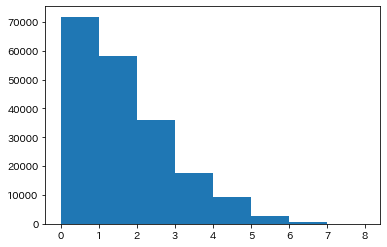

In [408]:
# 極端すぎてどっか行っちゃうあるある
feature = '条件数'
plt.hist(suumo[feature], bins=8)
plt.show()

In [412]:
condition = suumo[feature] == 8 
suumo.loc[condition,'条件数']

9463      8
96221     8
191245    8
191248    8
193681    8
193682    8
193683    8
193876    8
193877    8
193878    8
195211    8
195236    8
195283    8
Name: 条件数, dtype: int64

In [415]:
print(suumo.loc[9463,'url'])

https://suumo.jp/chintai/jnc_000067344711/?bc=100302041487


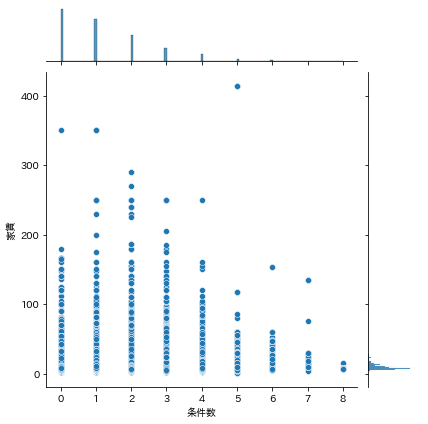

In [409]:
# やたら条件が多い物件は安いのか？
feature = '条件数'
sns.jointplot(data=suumo, x=feature, y='家賃')
plt.show()

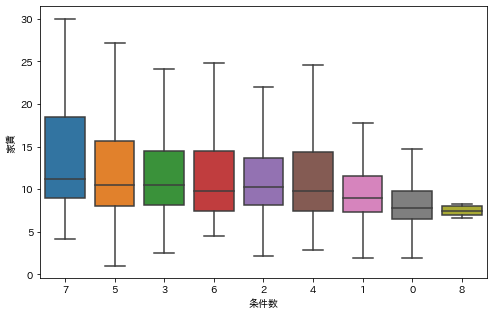

In [419]:
# 条件7だと高いけど8だと安いらしい…？
feature = '条件数'
order = order_mean(feature, '家賃', 'mean', False)
plt.figure(figsize=(8,5))
sns.boxplot(data=suumo, x=feature, y='家賃', order=order, sym='')
plt.show()

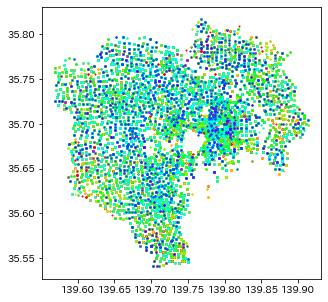

In [228]:
# 超高額物件に比べりゃ大抵の物件はゴミ同然さ
feature = '条件数'
order = sorted(suumo[feature].unique())
max_ = suumo[feature].max()
min_ = suumo[feature].min()
scale = max_ - min_

plt.figure(figsize=(5,5))
for value in order:
    condition = suumo[feature] == value
    plt.scatter(suumo.loc[condition,'経度'],suumo.loc[condition,'緯度'], color=cm.hsv((value-min_)/scale), s=1)
plt.show()

In [ ]:
'物件名', '家賃', '管理費・共益費', '敷金', '礼金', '保証金', '敷引・償却', '都道府県', '市区町村',
       '市区町村以下', '経度', '緯度', '皇居からの距離', '駅徒歩', '路線', '駅', '歩', 'バス', '車',
       '最寄駅からの距離', '部屋数', '間取り_S', '間取り_L', '間取り_D', '間取り_K', '面積', '築年数',
       '階数', '地下', '地上', '階', '向き', '建物種別', 'オプション', 'オプション数', '構造', '駐車場有無',
       '駐車場距離', '駐車場料金', '入居', '取引態様', '条件', '条件数', 'SUUMO物件コード', 'url'

In [144]:
condition_area = suumo['面積'] > 120
condition_height = suumo['地上'] > 30
condition_place = suumo['築年数'] < 15
condition = condition_area & condition_height & condition_place
suumo.loc[condition,['面積','地上','市区町村','築年数','家賃']]

面積  地上 市区町村  築年数    家賃
10844   134.1  34  文京区   13  94.0
166441  134.1  34  文京区   13  94.0
167295  134.1  34  文京区   13  94.0